## Housing Price Prediction:

### Probelem Statement:

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company. A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below. The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

For this company wants to know:

• Which variables are important to predict the price of variable?

• How do these variables describe the price of the house?

Business Goal: You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

### Technical Requirements:

• Data contains 1460 entries each having 81 variables.

• Data contains Null values. You need to treat them using the domain knowledge and your own understanding.

• Extensive EDA has to be performed to gain relationships of important variable and price.

• Data contains numerical as well as categorical variable. You need to handle them accordingly.

• You have to build Machine Learning models, apply regularization and determine the optimal values of Hyper Parameters.

• You need to find important features which affect the price positively or negatively.

• Two datasets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading and reading the data
df= pd.read_csv("train_data.csv")
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [3]:
#Checking the Data dimesion
df.shape

(1168, 81)

In [4]:
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Checking the columns in the dataset.

In [5]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [6]:
df.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[5 rows x 81 columns]

In [7]:
# Using the info method to get an idea about our dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1168 non-null   int64  
 1   MSSubClass     1168 non-null   int64  
 2   MSZoning       1168 non-null   object 
 3   LotFrontage    954 non-null    float64
 4   LotArea        1168 non-null   int64  
 5   Street         1168 non-null   object 
 6   Alley          77 non-null     object 
 7   LotShape       1168 non-null   object 
 8   LandContour    1168 non-null   object 
 9   Utilities      1168 non-null   object 
 10  LotConfig      1168 non-null   object 
 11  LandSlope      1168 non-null   object 
 12  Neighborhood   1168 non-null   object 
 13  Condition1     1168 non-null   object 
 14  Condition2     1168 non-null   object 
 15  BldgType       1168 non-null   object 
 16  HouseStyle     1168 non-null   object 
 17  OverallQual    1168 non-null   int64  
 18  OverallC

In [8]:
#Lets get a general idea about the dataset
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000    954.00000    1168.000000  1168.000000   
mean    724.136130    56.767979     70.98847   10484.749144     6.104452   
std     416.159877    41.940650     24.82875    8957.442311     1.390153   
min       1.000000    20.000000     21.00000    1300.000000     1.000000   
25%     360.500000    20.000000     60.00000    7621.500000     5.000000   
50%     714.500000    50.000000     70.00000    9522.500000     6.000000   
75%    1079.500000    70.000000     80.00000   11515.500000     7.000000   
max    1460.000000   190.000000    313.00000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1161.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   102.310078   444.726027  ...   
std       1.124343    30.145255     20.785185   182.595606   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

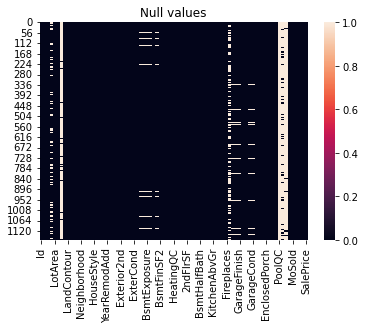

In [9]:
sns.heatmap(df.isnull())
plt.title('Null values')
plt.show()

At first glance, it appears that we are out of luck, as there are numerous missing data to be addressed. We should do some Feature Engineering on the Date Feature right now so that we may use the day and month segments in developing our model later. We saw earlier in info that Date is an object type, not a date type. Its type must be changed to date type.

In [10]:
#checking the skewness
df.skew()

Id                0.026526
MSSubClass        1.422019
LotFrontage       2.450241
LotArea          10.659285
OverallQual       0.175082
OverallCond       0.580714
YearBuilt        -0.579204
YearRemodAdd     -0.495864
MasVnrArea        2.826173
BsmtFinSF1        1.871606
BsmtFinSF2        4.365829
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
1stFlrSF          1.513707
2ndFlrSF          0.823479
LowQualFinSF      8.666142
GrLivArea         1.449952
BsmtFullBath      0.627106
BsmtHalfBath      4.264403
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
TotRmsAbvGrd      0.644657
Fireplaces        0.671966
GarageYrBlt      -0.644564
GarageCars       -0.358556
GarageArea        0.189665
WoodDeckSF        1.504929
OpenPorchSF       2.410840
EnclosedPorch     3.043610
3SsnPorch         9.770611
ScreenPorch       4.105741
PoolArea         13.243711
MiscVal          23.065943
MoSold            0.220979
YrSold            0.115765
S

As observed above we can see that we have o deal with skewness as it is present in the whole dataset.

In [11]:
# Let's explore the categorical columns

for column in df.columns:
    if df[column].dtypes == object:
        print(str(column) + ' : ' + str(df[column].unique()))
        print(df[column].value_counts())
        print('\n')

MSZoning : ['RL' 'RM' 'FV' 'RH' 'C (all)']
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


Street : ['Pave' 'Grvl']
Pave    1164
Grvl       4
Name: Street, dtype: int64


Alley : [nan 'Grvl' 'Pave']
Grvl    41
Pave    36
Name: Alley, dtype: int64


LotShape : ['IR1' 'Reg' 'IR2' 'IR3']
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


LandContour : ['Lvl' 'Bnk' 'HLS' 'Low']
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


Utilities : ['AllPub']
AllPub    1168
Name: Utilities, dtype: int64


LotConfig : ['Inside' 'CulDSac' 'FR2' 'Corner' 'FR3']
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


LandSlope : ['Gtl' 'Mod' 'Sev']
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


Neighborhood : ['NPkVill' 'NAmes' 'NoRidge' 'NWAmes' 'Gilbert' 'Sawyer' 'Edwards'
 'IDOTRR' 'CollgCr' 'Mitchel' 'Crawfor' 'BrDal

## Observations:

1. There is only one unique value present in utilities column so we will be dropping this column.

2. In categorical columns there are missing values present in coumns Alley, MasVnrType, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PoolQC, Fence, MiscFeature

## Handling missing values:

In [12]:
# Let's check if there any missing values in our dataset
df.isnull().values.any()

True

In [13]:
# Let's check the missing values of top 30 columns
df.isnull().sum().sort_values(ascending = False).head(30)

PoolQC          1161
MiscFeature     1124
Alley           1091
Fence            931
FireplaceQu      551
LotFrontage      214
GarageYrBlt       64
GarageFinish      64
GarageType        64
GarageQual        64
GarageCond        64
BsmtExposure      31
BsmtFinType2      31
BsmtQual          30
BsmtCond          30
BsmtFinType1      30
MasVnrType         7
MasVnrArea         7
Id                 0
Functional         0
Fireplaces         0
KitchenQual        0
KitchenAbvGr       0
BedroomAbvGr       0
HalfBath           0
FullBath           0
BsmtHalfBath       0
BsmtFullBath       0
TotRmsAbvGrd       0
GarageCars         0
dtype: int64

### Observation:
There are 1161 missing values in the column PoolQC, 1124 in MiscFeature, 11091 in Alley, 931 in Fence, 551 in FireplaceQu,214 in LotFrontage, 64 each in GarageType, GarageCond, GarageYrBlt, GarageFinish, GarageQual, 31 in BsmtExposure and BsmtFinType2, 30 in BsmtCond and BsmtQual, 7 in MasVnrArea and MasVnrType present in our dataset.

<AxesSubplot:>

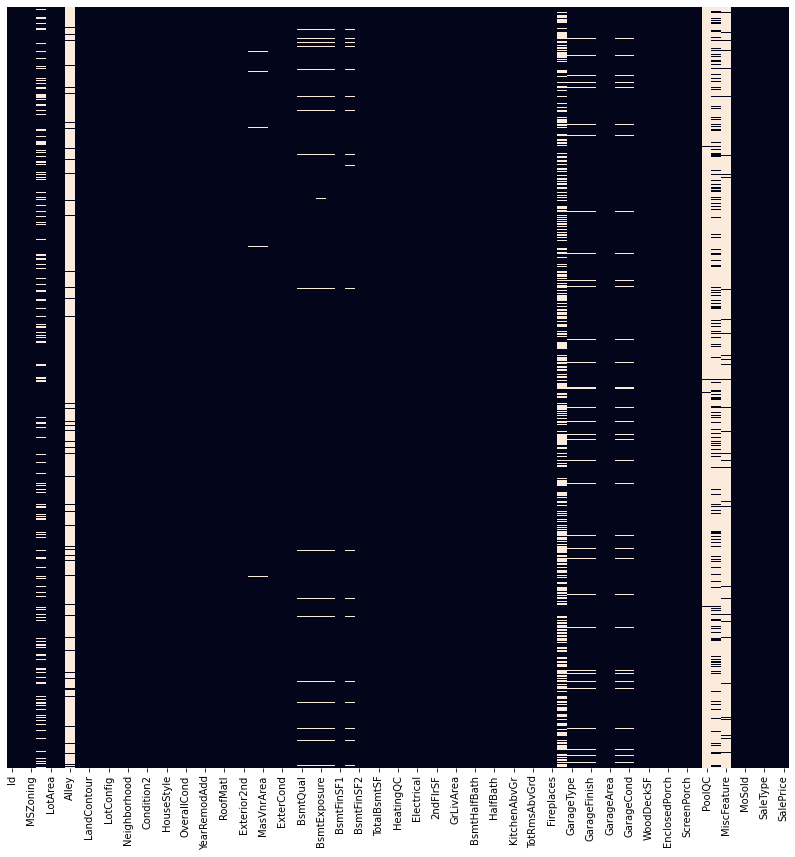

In [14]:
# Let's Visualize the missing values

plt.figure(figsize=(14,14))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

To understand it better we are viewing missing values with the help of visualization through heatmap.

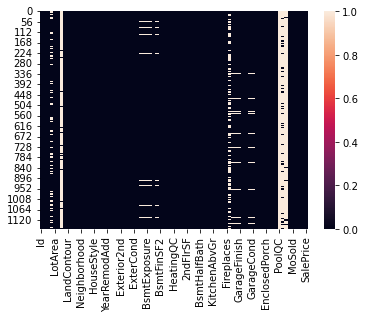

In [15]:
# Let's plot the heat map for our missing values

sns.heatmap(df.isnull());

In [16]:
# Let's check the percentage of missing values of each column

def missing_values_table(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    mis_val_table_ren_columns = mis_val_table.rename(
    columns = {0 : 'Missing Values', 1 : '% of Total Values'})
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
    '% of Total Values', ascending=False).round(1)
    print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
        "There are " + str(mis_val_table_ren_columns.shape[0]) +
            " columns that have missing values.")
    return mis_val_table_ren_columns
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 18 columns that have missing values.


Missing Values  % of Total Values
PoolQC                  1161               99.4
MiscFeature             1124               96.2
Alley                   1091               93.4
Fence                    931               79.7
FireplaceQu              551               47.2
LotFrontage              214               18.3
GarageType                64                5.5
GarageYrBlt               64                5.5
GarageFinish              64                5.5
GarageQual                64                5.5
GarageCond                64                5.5
BsmtExposure              31                2.7
BsmtFinType2              31                2.7
BsmtCond                  30                2.6
BsmtFinType1              30                2.6
BsmtQual                  30                2.6
MasVnrArea                 7                0.6
MasVnrType                 7                0.6

## Observation:
Majority of data is missing in the columns PoolQC, MiscFeature, Alley and Fence

In [17]:
# Let's fill the missing values in categorical columns as NA

columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
df[columns] = df[columns].fillna('NA')

In [18]:
# Let's fill the missing values in MasVnrType with None
df['MasVnrType'] = df['MasVnrType'].fillna('None')

In [19]:
# Let's fill the missing values in GarageYrBlt with 0

df['GarageYrBlt'] = df['GarageYrBlt'].fillna('0')

In [20]:
# Let's Imputing the missing values and replace it with the median

df['LotFrontage'].fillna(df['LotFrontage'].median(),inplace=True)
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [21]:
# Let's check the statistical summary of our dataset

df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1168.000000  1168.000000  1168.000000    1168.000000  1168.000000   
mean    724.136130    56.767979    70.807363   10484.749144     6.104452   
std     416.159877    41.940650    22.440317    8957.442311     1.390153   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     360.500000    20.000000    60.000000    7621.500000     5.000000   
50%     714.500000    50.000000    70.000000    9522.500000     6.000000   
75%    1079.500000    70.000000    79.250000   11515.500000     7.000000   
max    1460.000000   190.000000   313.000000  164660.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1168.000000  1168.000000   1168.000000  1168.000000  1168.000000  ...   
mean      5.595890  1970.930651   1984.758562   101.696918   444.726027  ...   
std       1.124343    30.145255     20.785185   182.218483   462.664785  ...   
min       1.000000  1875.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1966.000000     0.000000     0.000000  ...   
50%       5.000000  1972.000000   1993.000000     0.000000   385.500000  ...   
75%       6.000000  2000.000000   2004.000000   160.000000   714.500000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

## Observation:

1. Maximum standard deviation of 8957.44 is observed in LotArea column.

2. Maximum SalePrice of a house observed is 755000 and minimum is 34900.

3. In the columns Id, MSSubclass, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfsF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtFullBath, HalfBath, TotRmsAbvGrd, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, Miscval, salePrice mean is considerably greater than median so the columns are positively skewed.

4. In the columns FullBath, BedroomAbvGr, Fireplaces, Garagecars, GarageArea, YrSold Median is greater than mean so the columns are negatively skewed.

5. In the columns:
    Id, MSSubClass, LotFrontage, LotArea, MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea, BsmtHalfBath, BedroomAbvGr, ToRmsAbvGrd, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal, SalePrice there is considerable difference between the 75 percentile and maximum so outliers are present.

In [22]:
# Let's check the correlation

df_cor=df.corr()
df_cor

Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.004259    -0.006165 -0.029212    -0.036965   
MSSubClass     0.004259    1.000000    -0.336234 -0.124151     0.070462   
LotFrontage   -0.006165   -0.336234     1.000000  0.296790     0.229981   
LotArea       -0.029212   -0.124151     0.296790  1.000000     0.107188   
OverallQual   -0.036965    0.070462     0.229981  0.107188     1.000000   
OverallCond    0.039761   -0.056978    -0.047851  0.017513    -0.083167   
YearBuilt     -0.016942    0.023988     0.112000  0.005506     0.575800   
YearRemodAdd  -0.018590    0.056618     0.089513  0.027228     0.555945   
MasVnrArea    -0.061397    0.028215     0.188273  0.120192     0.403985   
BsmtFinSF1     0.003868   -0.052236     0.227732  0.221851     0.219643   
BsmtFinSF2     0.005269   -0.062403     0.001253  0.056656    -0.040893   
BsmtUnfSF     -0.019494   -0.134170     0.115628  0.006600     0.308676   
TotalBsmtSF   -0.013812   -0.214042     0.356180  0.259733     0.528285   
1stFlrSF       0.009647   -0.227927     0.402864  0.312843     0.458758   
2ndFlrSF      -0.029671    0.300366     0.089816  0.059803     0.316624   
LowQualFinSF  -0.070180    0.053737     0.008087 -0.001915    -0.039295   
GrLivArea     -0.024325    0.086448     0.374000  0.281360     0.599700   
BsmtFullBath   0.023027    0.004556     0.092807  0.142387     0.101732   
BsmtHalfBath  -0.043572    0.008207     0.001375  0.059282    -0.030702   
FullBath      -0.015187    0.140807     0.171842  0.123197     0.548824   
HalfBath      -0.028512    0.168423     0.047149  0.007271     0.296134   
BedroomAbvGr   0.009376   -0.013283     0.236946  0.117351     0.099639   
KitchenAbvGr   0.001216    0.283506    -0.002082 -0.013075    -0.178220   
TotRmsAbvGrd  -0.001613    0.051179     0.318941  0.184546     0.432579   
Fireplaces    -0.024175   -0.035792     0.228494  0.285983     0.390067   
GarageCars     0.007549   -0.027639     0.260224  0.158313     0.596322   
GarageArea     0.010048   -0.092408     0.322750  0.195162     0.566782   
WoodDeckSF    -0.027498   -0.022609     0.087267  0.216720     0.227137   
OpenPorchSF   -0.013642    0.017468     0.151044  0.093080     0.341030   
EnclosedPorch  0.004885   -0.004252     0.021103 -0.007446    -0.098374   
3SsnPorch     -0.021773   -0.043210     0.050499  0.025794     0.045919   
ScreenPorch    0.005169   -0.013291     0.030440  0.025256     0.059387   
PoolArea       0.065832    0.009583     0.195973  0.097107     0.072247   
MiscVal        0.001304   -0.023503    -0.002830  0.051679    -0.025786   
MoSold         0.023479   -0.016015     0.022579  0.015141     0.090638   
YrSold        -0.008853   -0.038595    -0.004162 -0.035399    -0.048759   
SalePrice     -0.023897   -0.060775     0.323851  0.249499     0.789185   

               OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  \
Id                0.039761  -0.016942     -0.018590   -0.061397    0.003868   
MSSubClass       -0.056978   0.023988      0.056618    0.028215   -0.052236   
LotFrontage      -0.047851   0.112000      0.089513    0.188273    0.227732   
LotArea           0.017513   0.005506      0.027228    0.120192    0.221851   
OverallQual      -0.083167   0.575800      0.555945    0.403985    0.219643   
OverallCond       1.000000  -0.377731      0.080669   -0.135133   -0.028810   
YearBuilt        -0.377731   1.000000      0.592829    0.318562    0.227933   
YearRemodAdd      0.080669   0.592829      1.000000    0.178583    0.114430   
MasVnrArea       -0.135133   0.318562      0.178583    1.000000    0.263377   
BsmtFinSF1       -0.028810   0.227933      0.114430    0.263377    1.000000   
BsmtFinSF2        0.044336  -0.027682     -0.044694   -0.064685   -0.052145   
BsmtUnfSF        -0.146384   0.155559      0.174732    0.108974   -0.499861   
TotalBsmtSF      -0.162481   0.386265      0.280720    0.362330    0.518940   
1stFlrSF         -0.134420   0.279450      0.233384    0.334512 

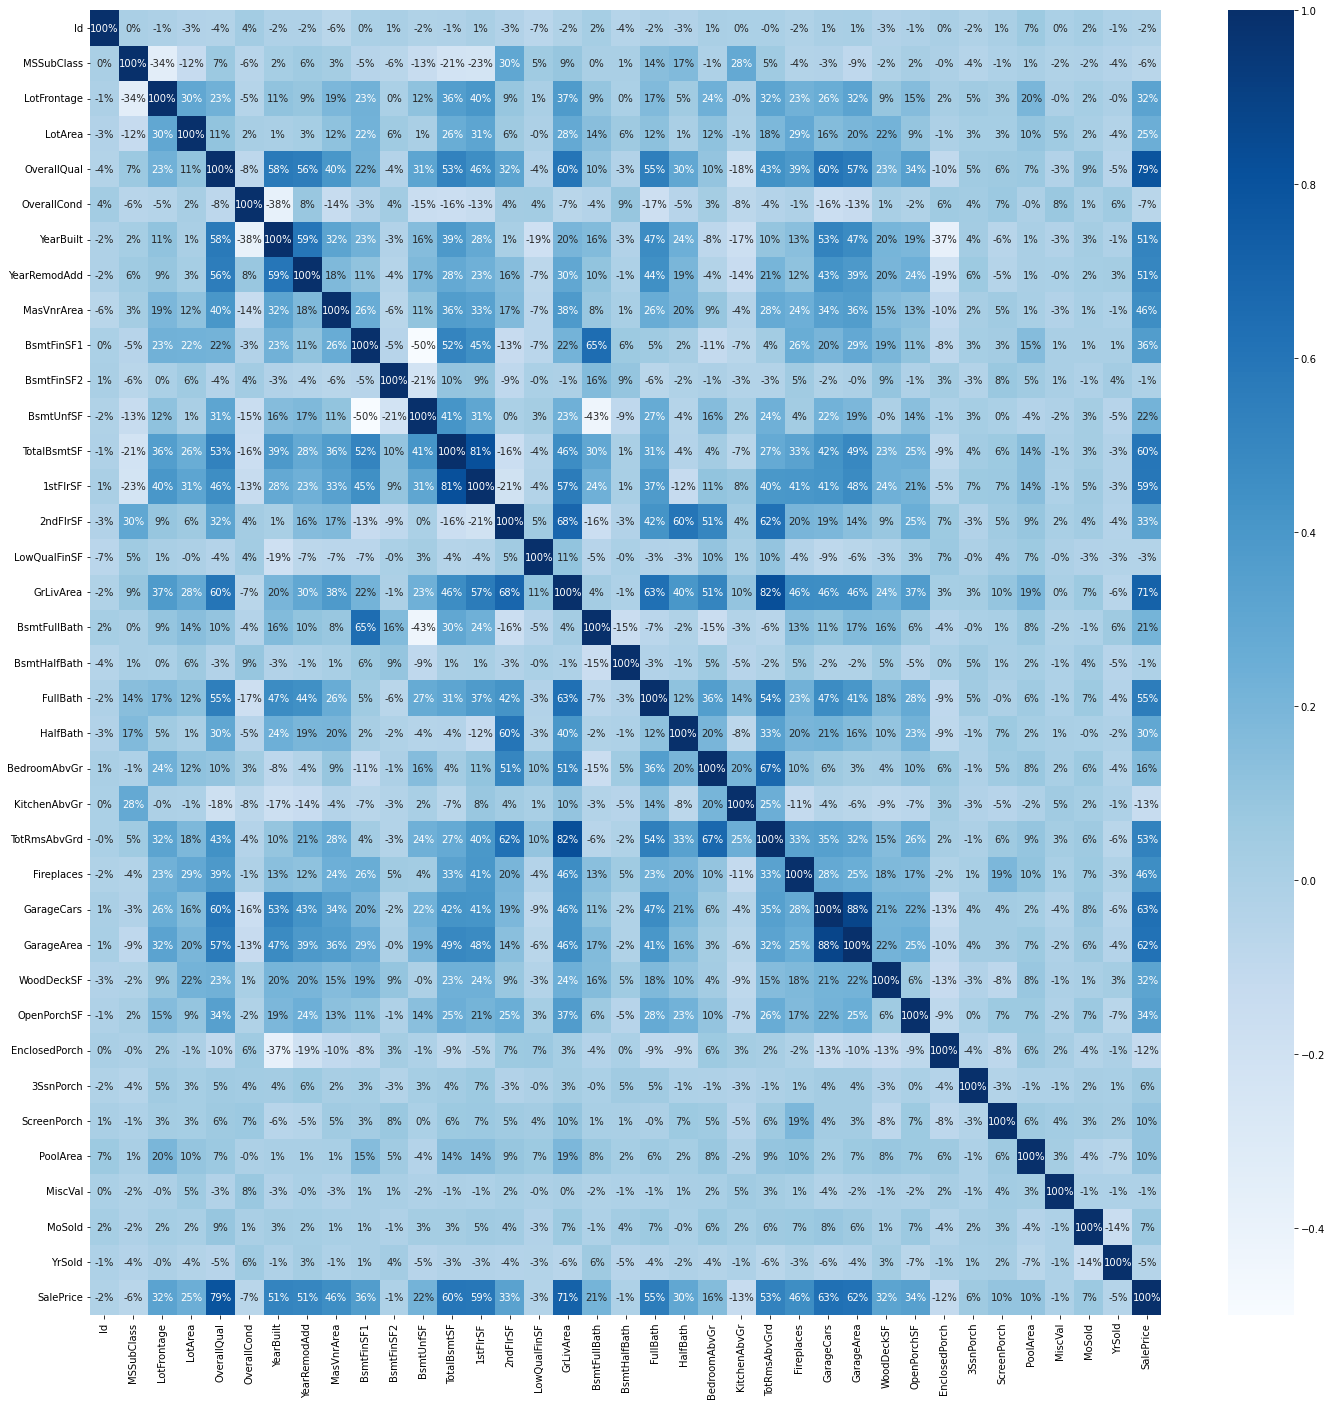

In [23]:
# Let's plot the heat map

plt.figure(figsize=(24,24))
sns.heatmap(df_cor,annot=True,fmt='.0%',cmap='Blues')
plt.show()

## Observation:

1. SalePrice is highly positively correlated with the columns OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, 1stFlrSF, GrLivArea, FullBath, TotRmsAbvGrd, GarageCars, GarageArea.

2. SalePrice is negatively correlated with OverallCond, KitchenAbvGr, Encloseporch, YrSold.

3. We observe multicollinearity in between columns so we will be using Principal Component Analysis(PCA).

4. No correlation has been observed between the column Id and other columns so we will be dropping this column.

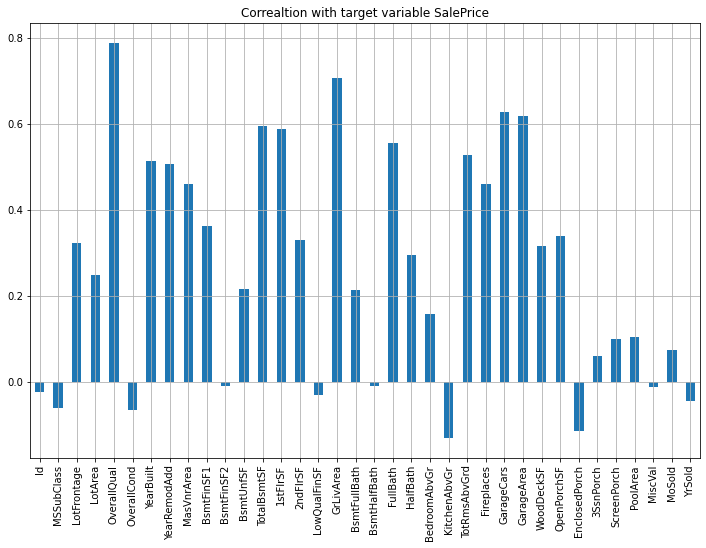

In [24]:
# Let's check the correlation with target variable 'SalePrice'

plt.figure(figsize=(12,8))
df.drop('SalePrice', axis=1).corrwith(df['SalePrice']).plot(kind='bar',grid=True)
plt.xticks(rotation='vertical')
plt.title("Correaltion with target variable SalePrice");

## Observation:

1. The column OverallQual is most positively correlated with SalePrice.
2. The column KitchenAbvGrd is most negatively correlated with SalePrice.

# Data Visualization:

## Univaraite Analysis:

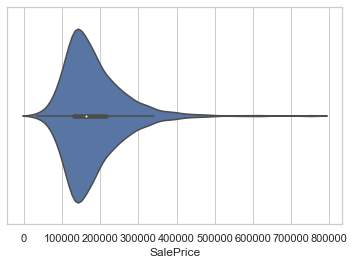

140000    18
135000    16
155000    12
139000    11
160000    11
          ..
203000     1
144900     1
37900      1
178400     1
183200     1
Name: SalePrice, Length: 581, dtype: int64

In [25]:
# Let's Check the target variable

sns.set(style='whitegrid')
sns.violinplot(df['SalePrice'])
plt.show()

df['SalePrice'].value_counts()

## Observation:

Maximum number of SalePrice lies between 140000 and 230000.

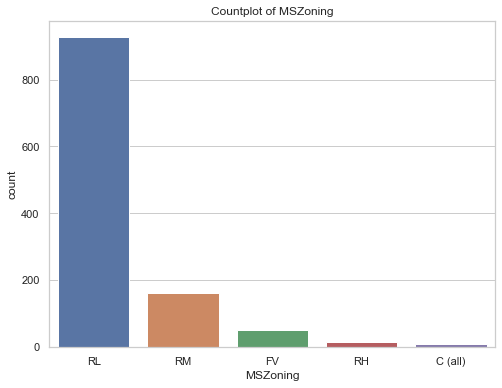

RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64

In [26]:
# Let's check the column MsZoning

plt.subplots(figsize=(8,6))
sns.countplot(x="MSZoning", data=df)
plt.title("Countplot of MSZoning")
plt.xlabel('MSZoning')
plt.ylabel("count")
plt.show()

df['MSZoning'].value_counts()

## Observation:
Maximum of 928 number of MSZoning are RL.

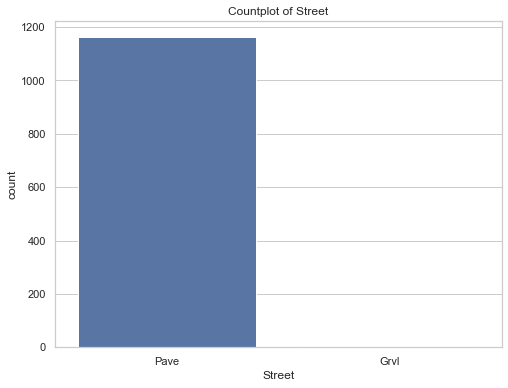

Pave    1164
Grvl       4
Name: Street, dtype: int64

In [27]:
# Let's check the column Street

plt.subplots(figsize=(8,6))
sns.countplot(x="Street", data=df)
plt.title("Countplot of Street")
plt.xlabel('Street')
plt.ylabel("count")
plt.show()

df['Street'].value_counts()

## Observation:
Maximum of 1164 number of Street are Pave where as only 4 are Grvl.

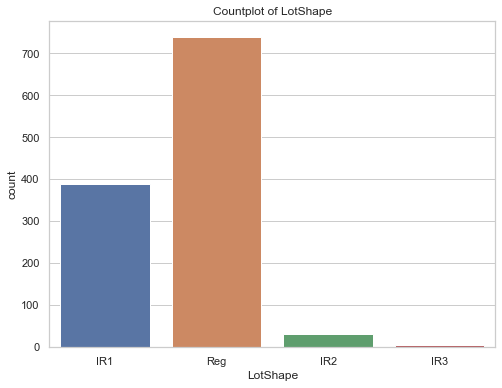

Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64

In [28]:
# Let's check the column LotShape

plt.subplots(figsize=(8,6))
sns.countplot(x="LotShape", data=df)
plt.title("Countplot of LotShape")
plt.xlabel('LotShape')
plt.ylabel("count")
plt.show()

df['LotShape'].value_counts()

## Observation:
Maximum of 740 number of LotShape are Reg.

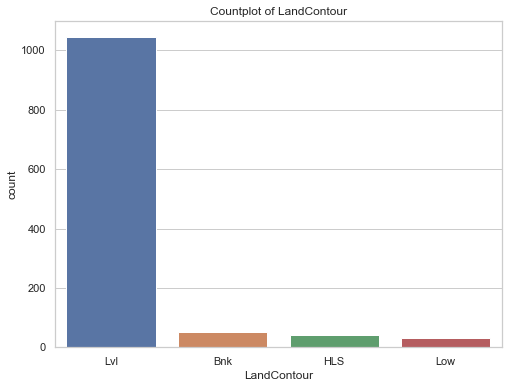

Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64

In [29]:
# Let's check the column LandContour

plt.subplots(figsize=(8,6))
sns.countplot(x="LandContour", data=df)
plt.title("Countplot of LandContour")
plt.xlabel('LandContour')
plt.ylabel("count")
plt.show()

df['LandContour'].value_counts()

## Observation:
Maximum, 1046 number of LandContour are Lvl.

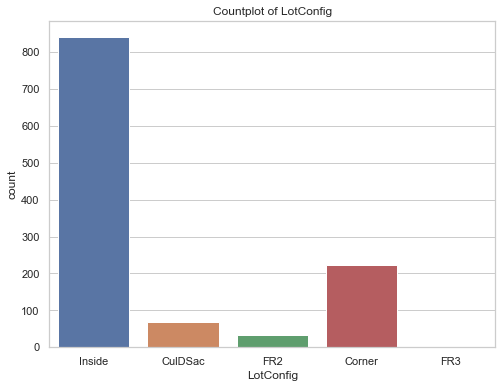

Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64

In [30]:
# Let's check the column LotConfig

plt.subplots(figsize=(8,6))
sns.countplot(x="LotConfig", data=df)
plt.title("Countplot of LotConfig")
plt.xlabel('LotConfig')
plt.ylabel("count")
plt.show()

df['LotConfig'].value_counts()

## Observation:
Maximum of 842 number of LotConfig are Inside

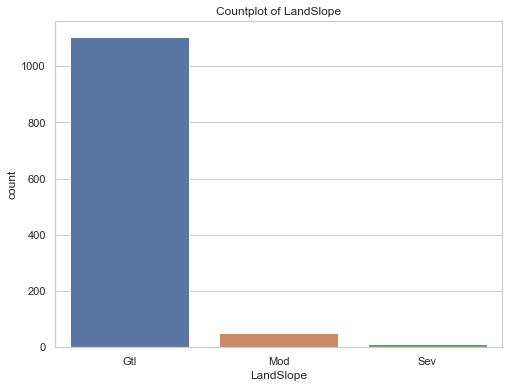

Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64

In [31]:
# Let's check the column LandSlope

plt.subplots(figsize=(8,6))
sns.countplot(x="LandSlope", data=df)
plt.title("Countplot of LandSlope")
plt.xlabel('LandSlope')
plt.ylabel("count")
plt.show()

df['LandSlope'].value_counts()

## Observation:
Maximum of 1105 number of LandSlope are Gtl.

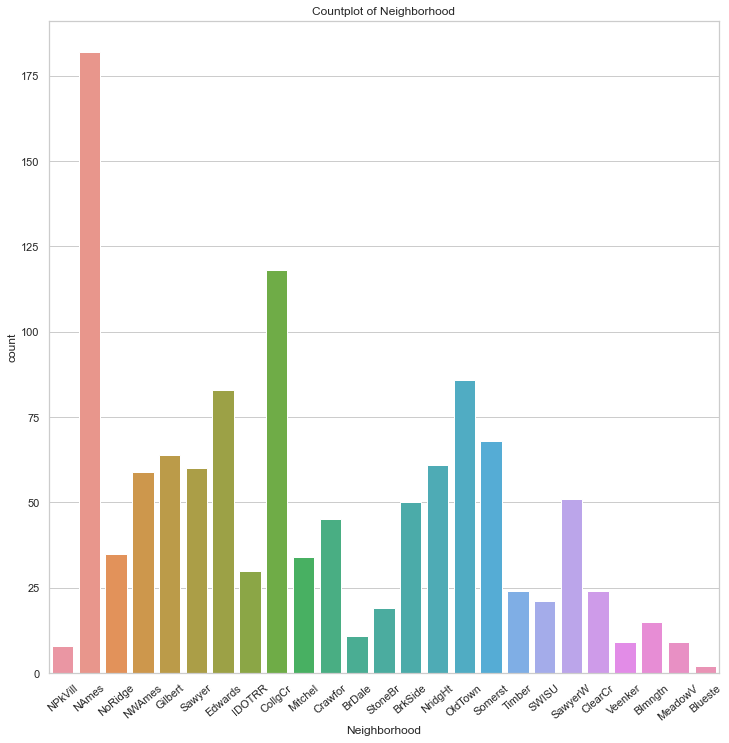

NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64

In [32]:
# Let's check the column Neighborhood

plt.subplots(figsize=(12,12))
sns.countplot(x="Neighborhood", data=df)
plt.title("Countplot of Neighborhood")
plt.xticks(rotation=40)
plt.xlabel('Neighborhood')
plt.ylabel("count")
plt.show()

df['Neighborhood'].value_counts()

## Observation:
Maximum of 182 number of Neighborhood are Names.

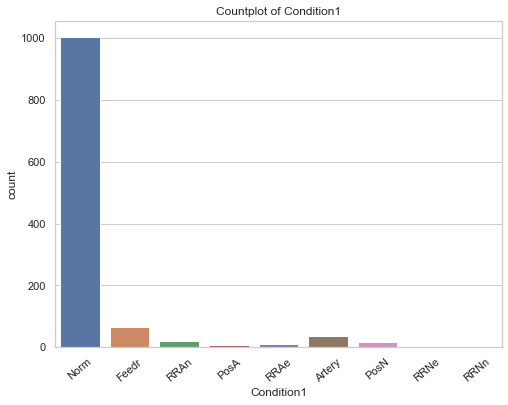

Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64

In [33]:
# Let's check the column Condition1

plt.subplots(figsize=(8,6))
sns.countplot(x="Condition1", data=df)
plt.title("Countplot of Condition1")
plt.xticks(rotation=40)
plt.xlabel('Condition1')
plt.ylabel("count")
plt.show()

df['Condition1'].value_counts()

## Observation:
Maximum of 1005 number of Condition1 is Norm.

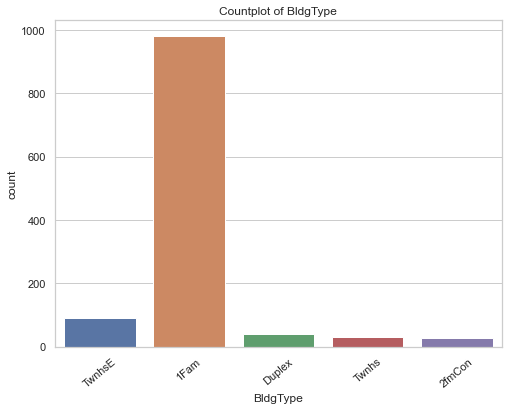

1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64

In [34]:
# Let's check the column BldgType

plt.subplots(figsize=(8,6))
sns.countplot(x="BldgType", data=df)
plt.title("Countplot of BldgType")
plt.xticks(rotation=40)
plt.xlabel('BldgType')
plt.ylabel("count")
plt.show()

df['BldgType'].value_counts()

## Observation:
Maximum of 981 number of BldgType are 1Fam.

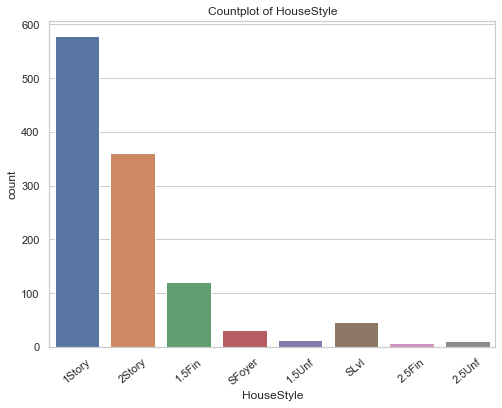

1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64

In [35]:
# Let's check the column HouseStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="HouseStyle", data=df)
plt.title("Countplot of HouseStyle")
plt.xticks(rotation=40)
plt.xlabel('HouseStyle')
plt.ylabel("count")
plt.show()

df['HouseStyle'].value_counts()

## Observation:
1Story has highest number of count followed by 2Story, 1.5Fin, SlvL etc.

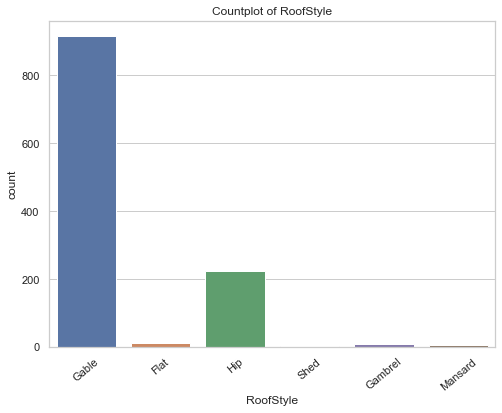

Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64

In [36]:
# Let's check the column RoofStyle

plt.subplots(figsize=(8,6))
sns.countplot(x="RoofStyle", data=df)
plt.title("Countplot of RoofStyle")
plt.xticks(rotation=40)
plt.xlabel('RoofStyle')
plt.ylabel("count")
plt.show()

df['RoofStyle'].value_counts()

## Observation:
Maximum of 915 number of RoofStyle are Gable.

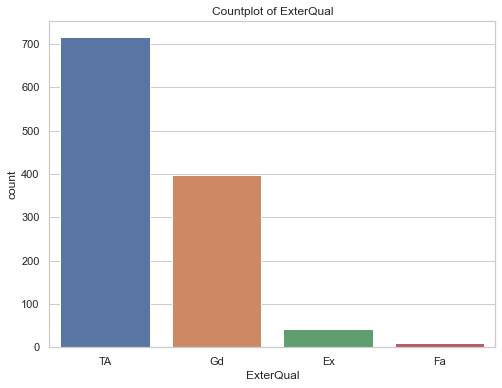

TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64

In [37]:
# Let's check the column ExterQual

plt.subplots(figsize=(8,6))
sns.countplot(x="ExterQual", data=df)
plt.title("Countplot of ExterQual")
plt.xlabel('ExterQual')
plt.ylabel("count")
plt.show()

df['ExterQual'].value_counts()

## Observation:
Maximum of 717 number of ExterQual is TA.

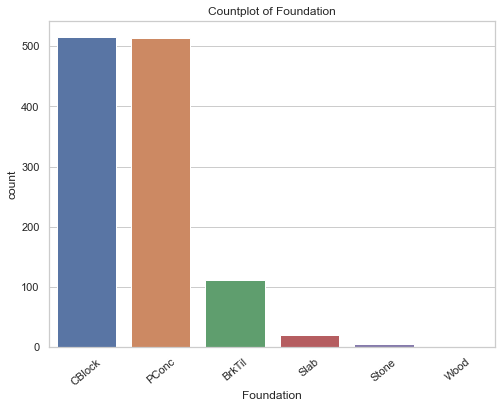

CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64

In [38]:
# Let's checking the column Foundation

plt.subplots(figsize=(8,6))
sns.countplot(x="Foundation", data=df)
plt.title("Countplot of Foundation")
plt.xticks(rotation=40)
plt.xlabel('Foundation')
plt.ylabel("count")
plt.show()

df['Foundation'].value_counts()

## Observation:
Maximum of 516 number of Foundation are CBlock.

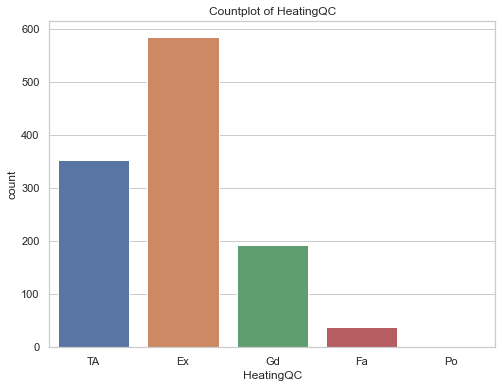

Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64

In [39]:
# Let's check the column HeatingQC

plt.subplots(figsize=(8,6))
sns.countplot(x="HeatingQC", data=df)
plt.title("Countplot of HeatingQC")
plt.xlabel('HeatingQC')
plt.ylabel("count")
plt.show()

df['HeatingQC'].value_counts()

## Observation:
Maximum of 585 number of HeatingQC is Ex.

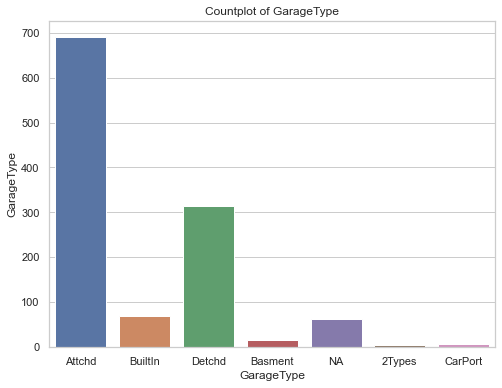

Attchd     691
Detchd     314
BuiltIn     70
NA          64
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64

In [40]:
# Let's check the column GarageType

plt.subplots(figsize=(8,6))
sns.countplot(x="GarageType", data=df)
plt.title("Countplot of GarageType")
plt.xlabel('GarageType')
plt.ylabel("GarageType")
plt.show()

df['GarageType'].value_counts()

## Observation:
Maximum of 691 number of GarageType are Attchd.

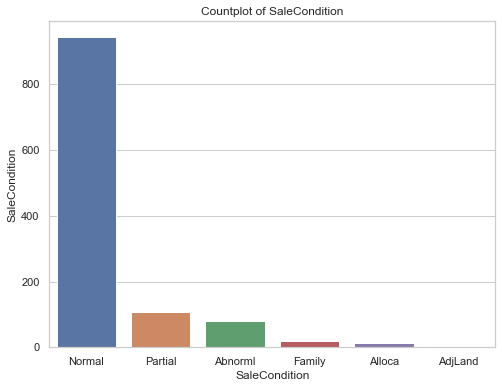

Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64

In [41]:
# Let's check the column SaleCondition

plt.subplots(figsize=(8,6))
sns.countplot(x="SaleCondition", data=df)
plt.title("Countplot of SaleCondition")
plt.xlabel('SaleCondition')
plt.ylabel("SaleCondition")
plt.show()

df['SaleCondition'].value_counts()

## Observation:
Maximum of 945 number of SaleCondition is normal.

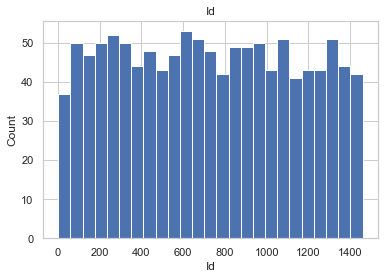

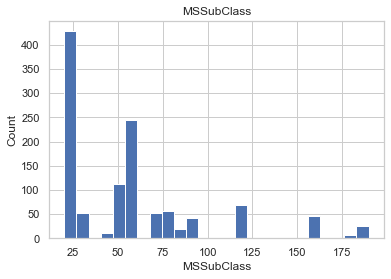

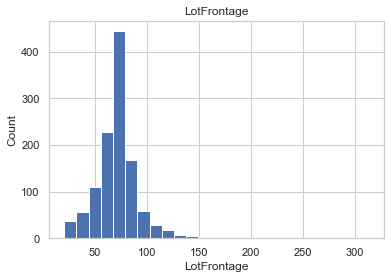

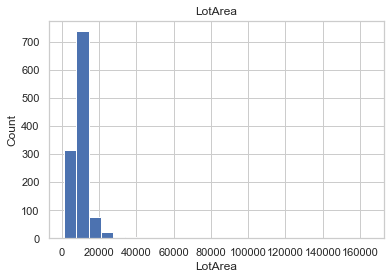

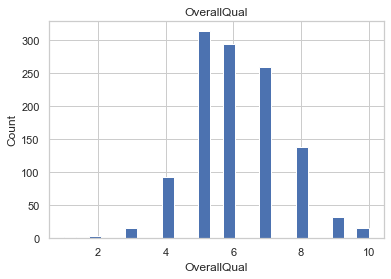

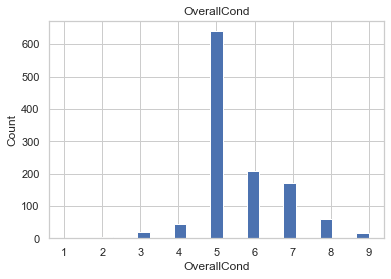

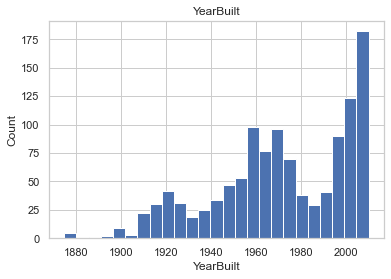

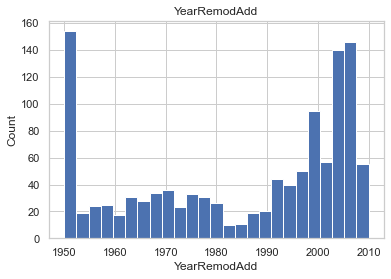

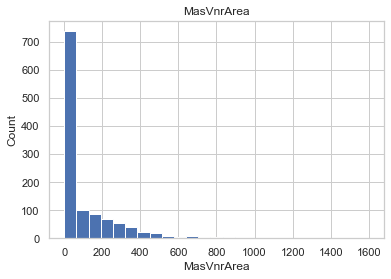

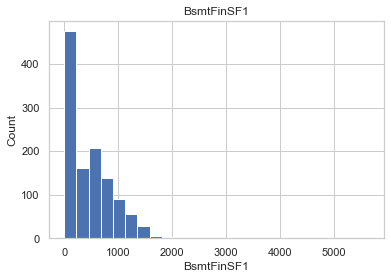

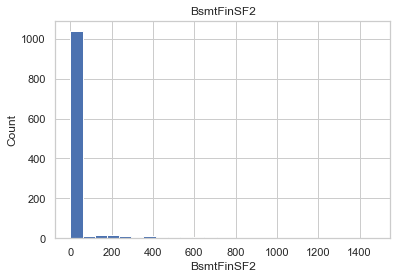

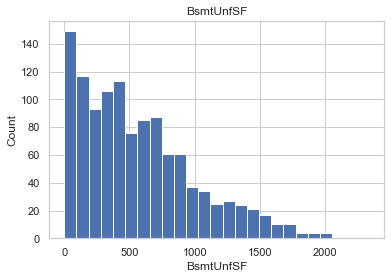

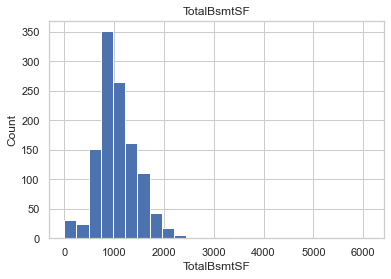

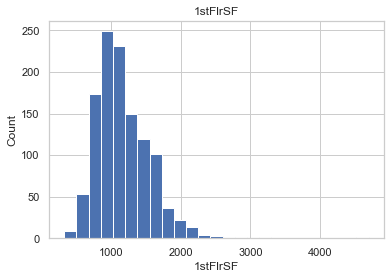

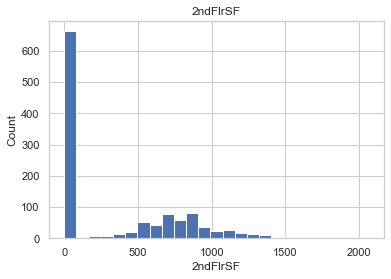

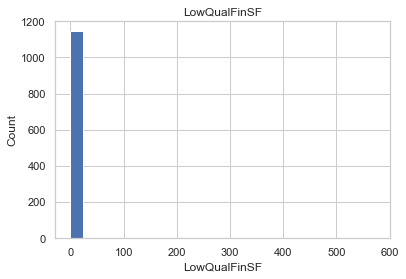

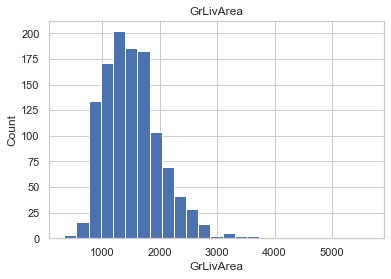

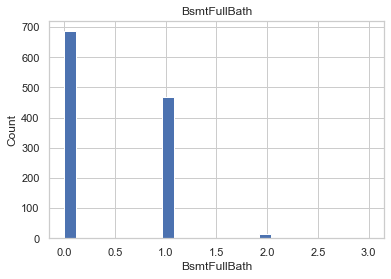

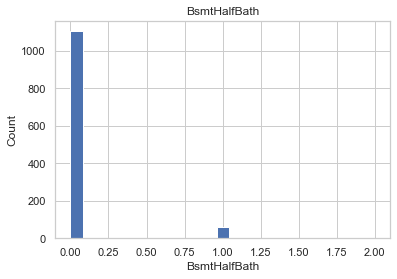

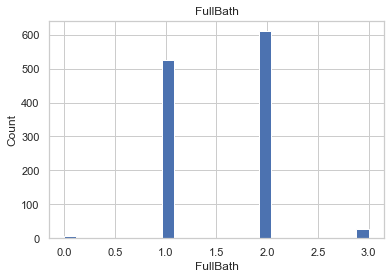

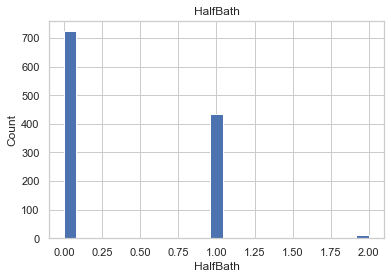

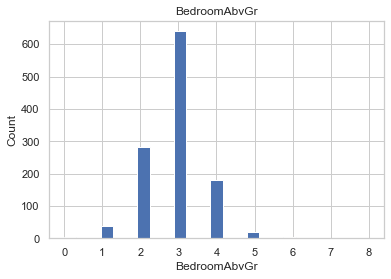

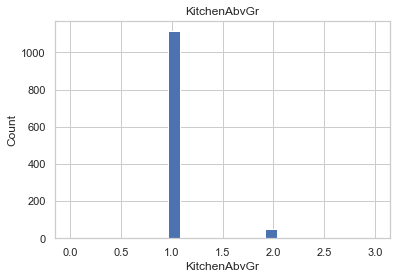

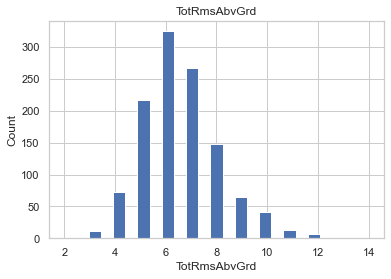

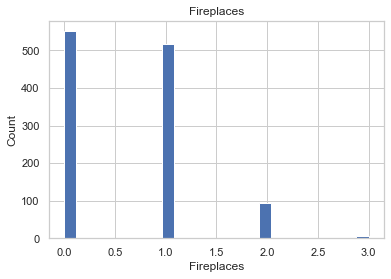

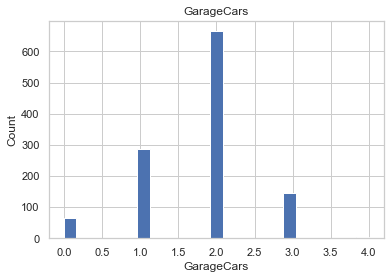

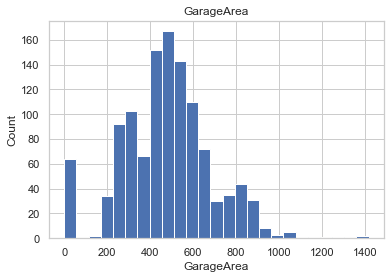

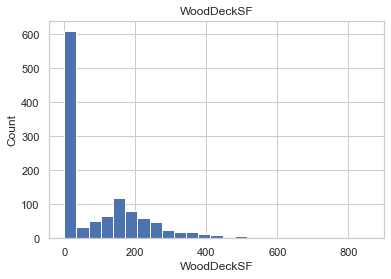

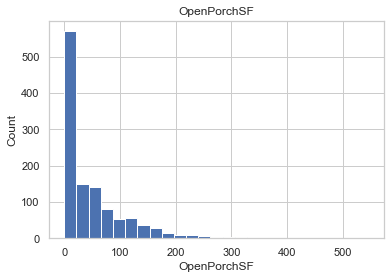

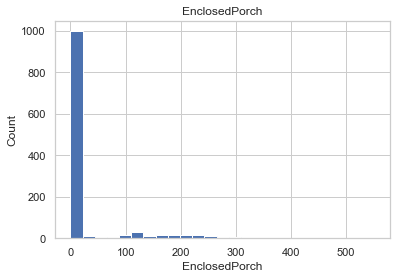

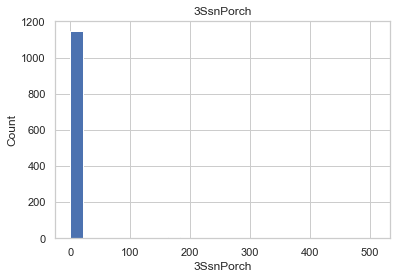

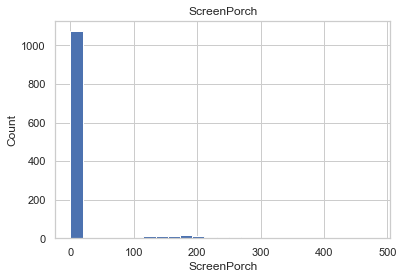

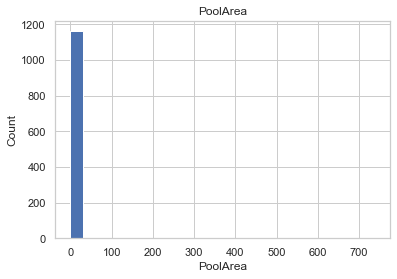

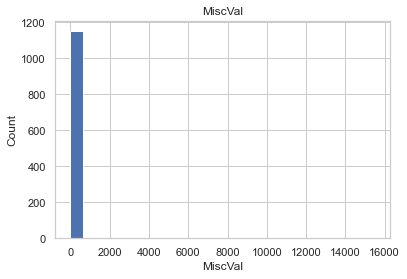

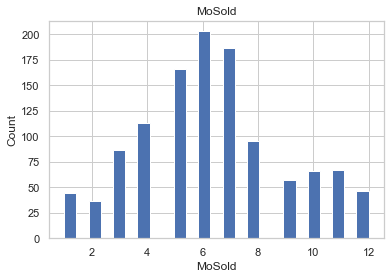

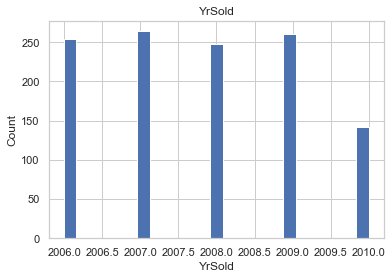

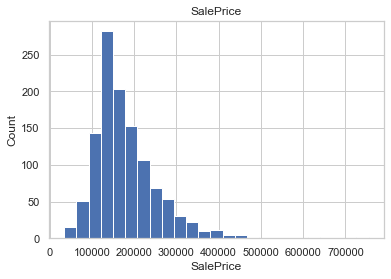

In [42]:
# Let's plot the histogram of every numerical column

for col in df.describe().columns:
    data=df.copy()
    data[col].hist(bins=25)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(col)
    plt.show()

## Bivariate Analysis:

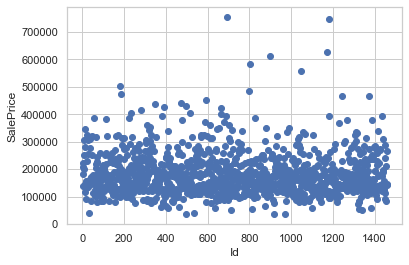

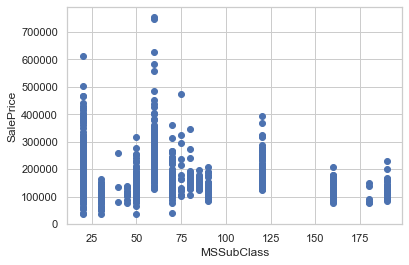

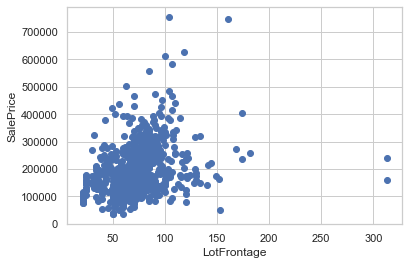

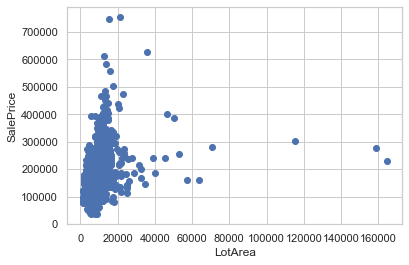

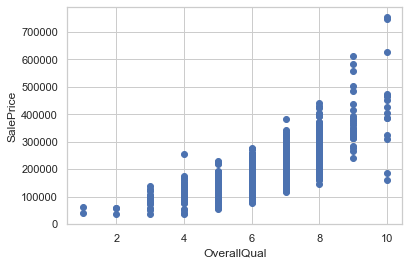

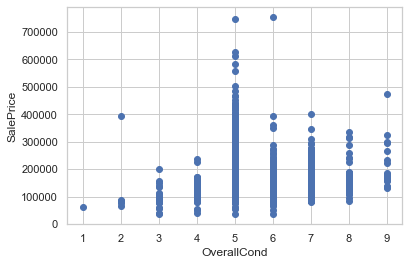

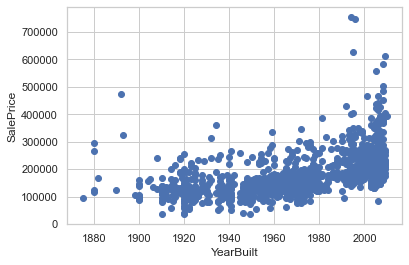

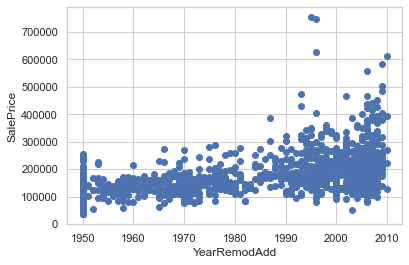

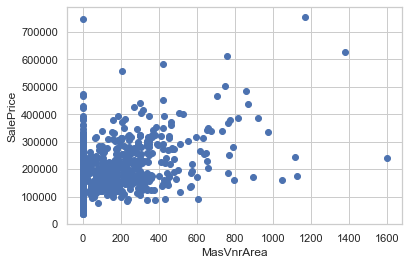

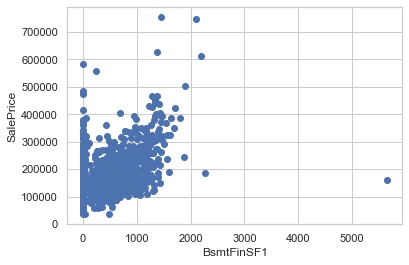

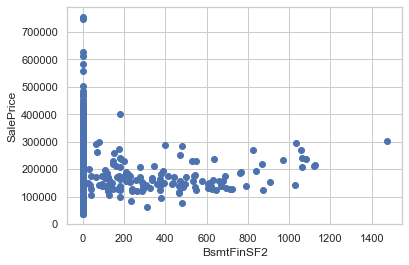

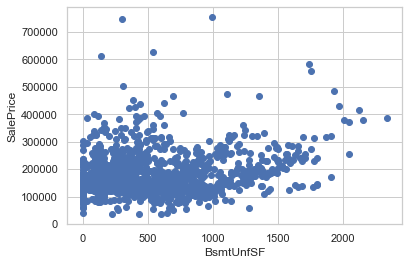

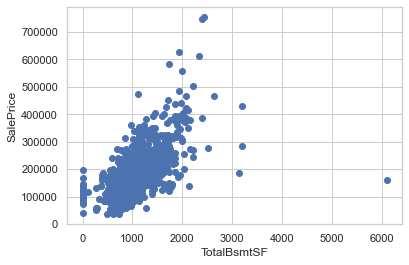

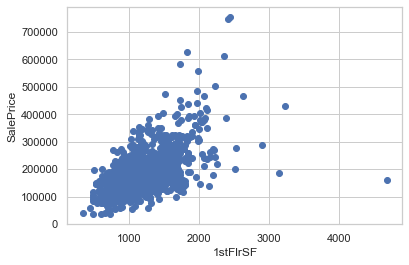

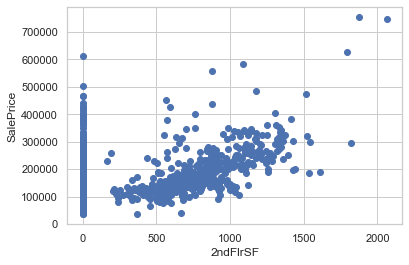

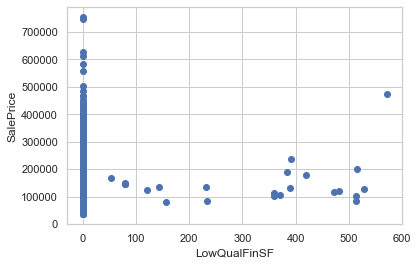

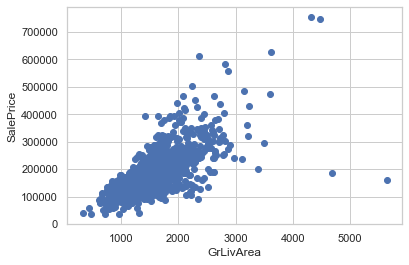

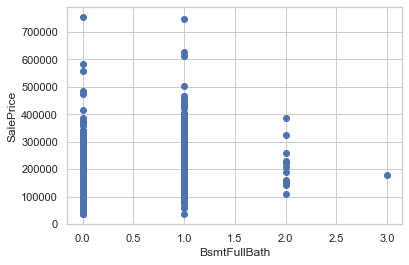

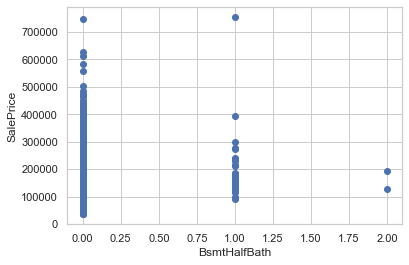

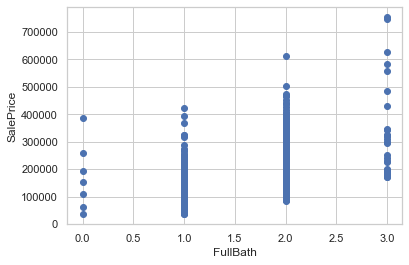

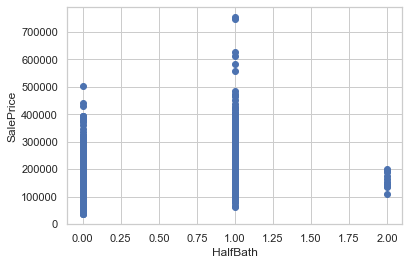

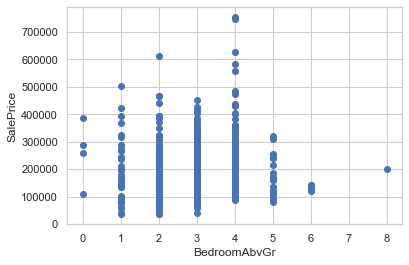

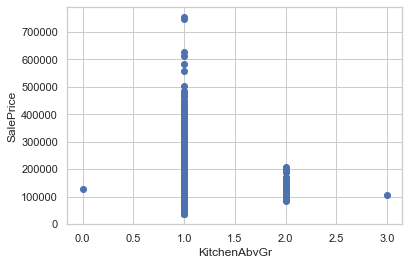

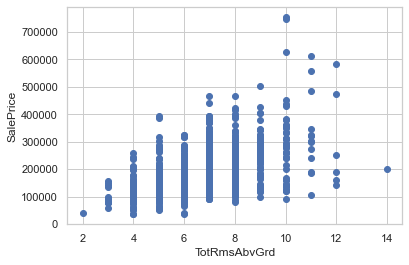

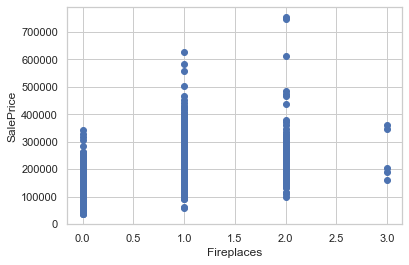

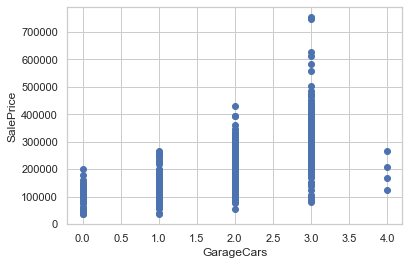

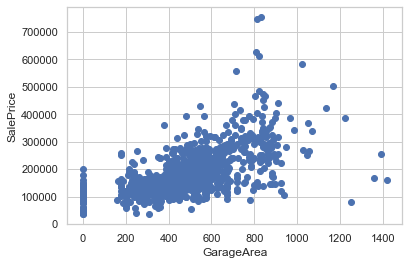

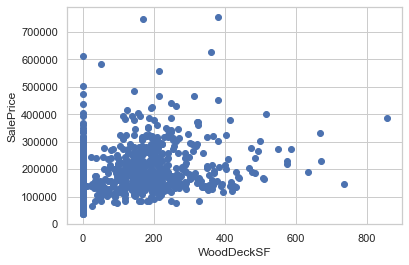

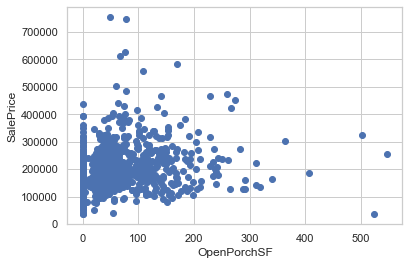

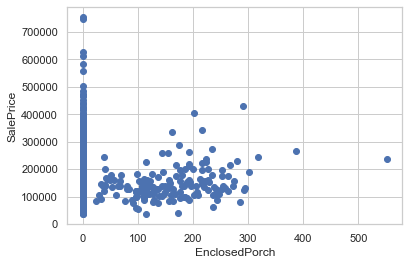

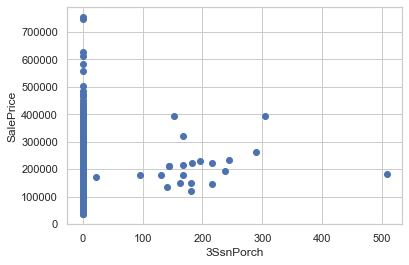

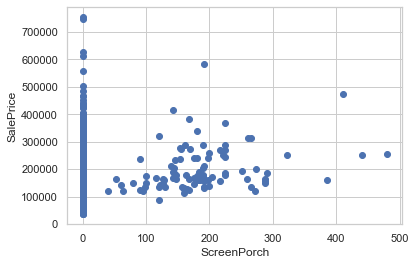

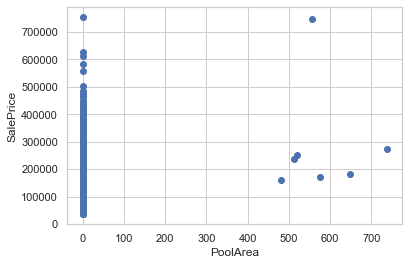

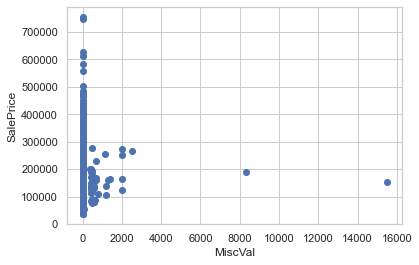

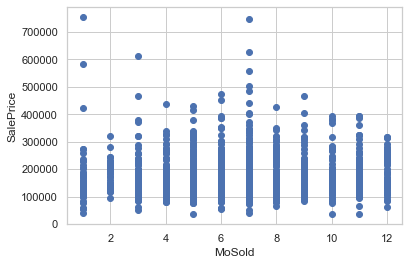

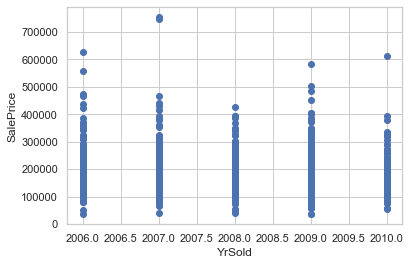

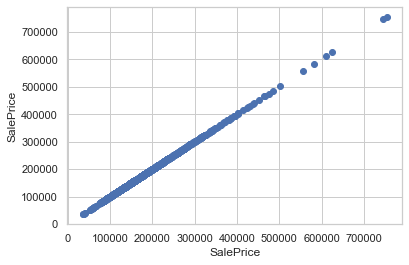

In [43]:
# Let's plot the Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    data=df.copy()
    plt.scatter(data[col],data['SalePrice'])
    plt.xlabel(col)
    plt.ylabel('SalePrice')
    plt.show()

<Figure size 576x432 with 0 Axes>

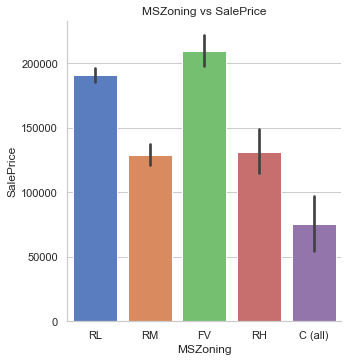

SalePrice  MSZoning
34900      C (all)     1
35311      C (all)     1
37900      RM          1
39300      RL          1
40000      C (all)     1
                      ..
582933     RL          1
611657     RL          1
625000     RL          1
745000     RL          1
755000     RL          1
Name: MSZoning, Length: 697, dtype: int64


In [44]:
# Let's plot the Factor plot of MSZoning vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='MSZoning',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('MSZoning vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df.groupby('SalePrice')['MSZoning'].value_counts());

## Observation:
SalePrice is maximum with FV MSZOning.

<Figure size 576x432 with 0 Axes>

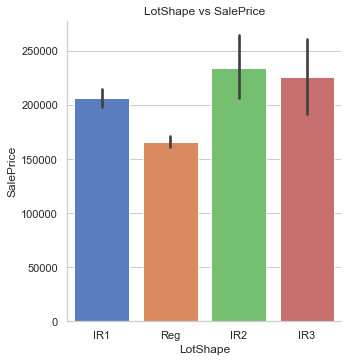

SalePrice  LotShape
34900      Reg         1
35311      Reg         1
37900      Reg         1
39300      Reg         1
40000      Reg         1
                      ..
582933     Reg         1
611657     IR1         1
625000     IR1         1
745000     IR1         1
755000     IR1         1
Name: LotShape, Length: 733, dtype: int64


In [45]:
# Let's plot the Factor plot of LotShape vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotShape',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotShape vs SalePrice')
plt.ylabel('SalePrice')
plt.show();
print(df.groupby('SalePrice')['LotShape'].value_counts());

## Observation:
SalePrice is maximum with IR2 LotShape.

<Figure size 576x432 with 0 Axes>

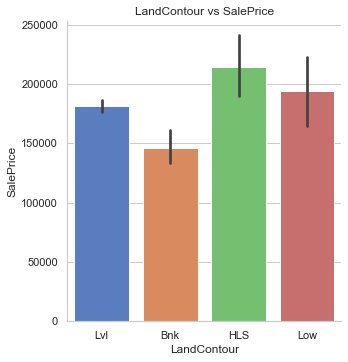

SalePrice  LandContour
34900      Lvl            1
35311      Lvl            1
37900      Lvl            1
39300      Low            1
40000      Lvl            1
                         ..
582933     Lvl            1
611657     Lvl            1
625000     Lvl            1
745000     Lvl            1
755000     Lvl            1
Name: LandContour, Length: 655, dtype: int64


In [46]:
# Let's plot the Factor plot of LandContour vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LandContour',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LandContour vs SalePrice')
plt.ylabel('SalePrice')
plt.show()
print(df.groupby('SalePrice')['LandContour'].value_counts())

## Observation:
SalePrice is maximum with HLS LandContour.

<Figure size 576x432 with 0 Axes>

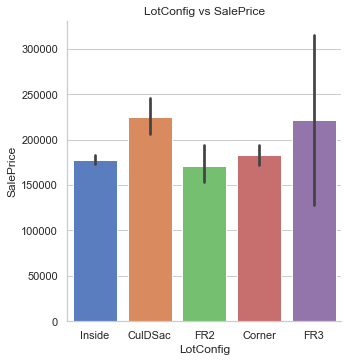

SalePrice  LotConfig
34900      Inside       1
35311      Inside       1
37900      Inside       1
39300      Inside       1
40000      Inside       1
                       ..
582933     Inside       1
611657     Inside       1
625000     CulDSac      1
745000     Corner       1
755000     Corner       1
Name: LotConfig, Length: 743, dtype: int64


In [47]:
# Let's plot the Factor plot of LotConfig vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='LotConfig',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('LotConfig vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['LotConfig'].value_counts())

## Observation:
SalePrice is maximum with CulDsac LotConfig.

<Figure size 1152x1152 with 0 Axes>

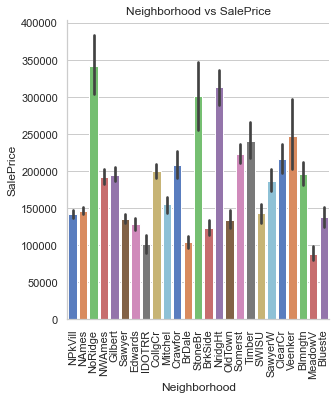

SalePrice  Neighborhood
34900      IDOTRR          1
35311      IDOTRR          1
37900      OldTown         1
39300      BrkSide         1
40000      IDOTRR          1
                          ..
582933     NridgHt         1
611657     NridgHt         1
625000     NoRidge         1
745000     NoRidge         1
755000     NoRidge         1
Name: Neighborhood, Length: 1013, dtype: int64


In [48]:
# Let's plo the Factor plot of Neighborhood vs SalePrice

plt.figure(figsize=(16,16))
sns.factorplot(x='Neighborhood',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('Neighborhood vs SalePrice')
plt.xticks(rotation='vertical')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['Neighborhood'].value_counts())

## Observation:
SalePrice is maximum with NoRidge Neighborhood.

<Figure size 576x432 with 0 Axes>

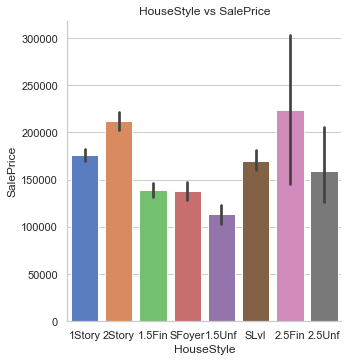

SalePrice  HouseStyle
34900      1Story        1
35311      1Story        1
37900      1.5Fin        1
39300      1Story        1
40000      2Story        1
                        ..
582933     2Story        1
611657     1Story        1
625000     2Story        1
745000     2Story        1
755000     2Story        1
Name: HouseStyle, Length: 840, dtype: int64


In [49]:
# Let's plot the Factor plot of HouseStyle vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='HouseStyle',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('HouseStyle vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['HouseStyle'].value_counts())

## Observation:
SalePrice is maximum with 2.5Fin HouseStyle.

<Figure size 576x432 with 0 Axes>

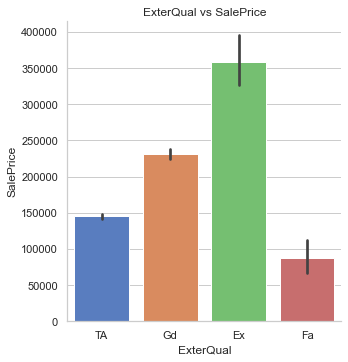

SalePrice  ExterQual
34900      TA           1
35311      TA           1
37900      TA           1
39300      Fa           1
40000      TA           1
                       ..
582933     Ex           1
611657     Ex           1
625000     Gd           1
745000     Gd           1
755000     Ex           1
Name: ExterQual, Length: 679, dtype: int64


In [50]:
# Let's plot the Factor plot of ExterQual vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='ExterQual',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('ExterQual vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['ExterQual'].value_counts())

## Observation:
SalePrice is maximum with Ex ExterQual.

<Figure size 576x432 with 0 Axes>

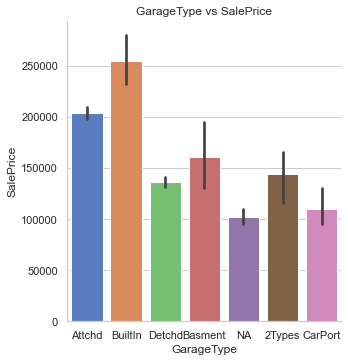

SalePrice  GarageType
34900      NA            1
35311      Detchd        1
37900      NA            1
39300      NA            1
40000      Detchd        1
                        ..
582933     BuiltIn       1
611657     Attchd        1
625000     Attchd        1
745000     Attchd        1
755000     Attchd        1
Name: GarageType, Length: 762, dtype: int64


In [51]:
# Let's plot the Factor plot of GarageType vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='GarageType',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('GarageType vs SalePrice')
plt.ylabel('SalePrice')
plt.show()


print(df.groupby('SalePrice')['GarageType'].value_counts())

## Observation:
SalePrice is maximum with Builtin GarageType.

<Figure size 576x432 with 0 Axes>

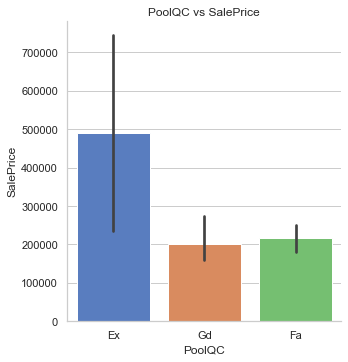

SalePrice  PoolQC
160000     Gd        1
171000     Gd        1
181000     Fa        1
235000     Ex        1
250000     Fa        1
274970     Gd        1
745000     Ex        1
Name: PoolQC, dtype: int64


In [52]:
# Let's plot the Factor plot of PoolQC vs SalePrice

plt.figure(figsize=(8,6))
sns.factorplot(x='PoolQC',y='SalePrice',data=df,kind='bar',size=5,palette='muted',aspect=1)
plt.title('PoolQC vs SalePrice')
plt.ylabel('SalePrice')
plt.show()

print(df.groupby('SalePrice')['PoolQC'].value_counts())

## Observation:
SalePrice is maximum with Ex PoolQC.

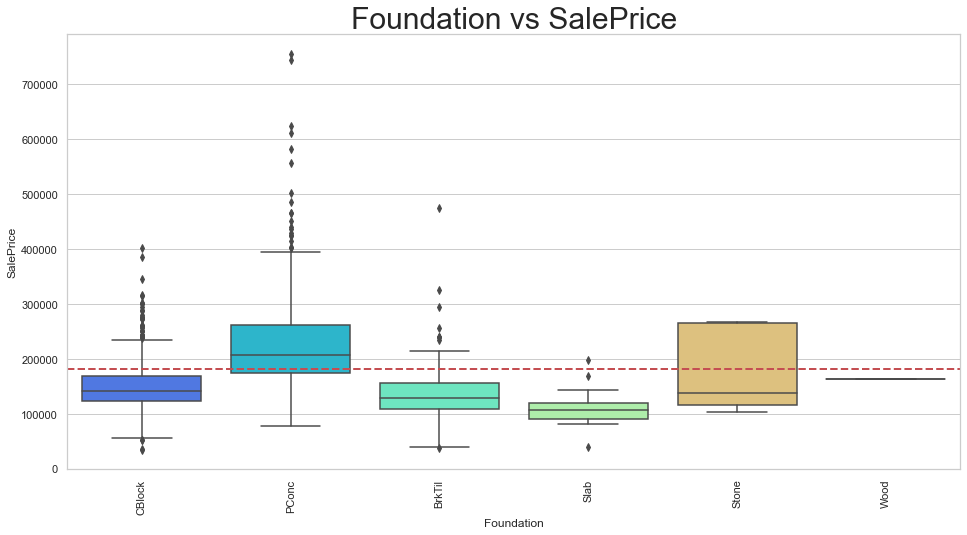

In [53]:
# Let's plot the Foundation vs SalePrice plot

plt.figure(figsize=(16,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='Foundation',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("Foundation vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()

## Observation:
SalePrice is maximum with PConc.

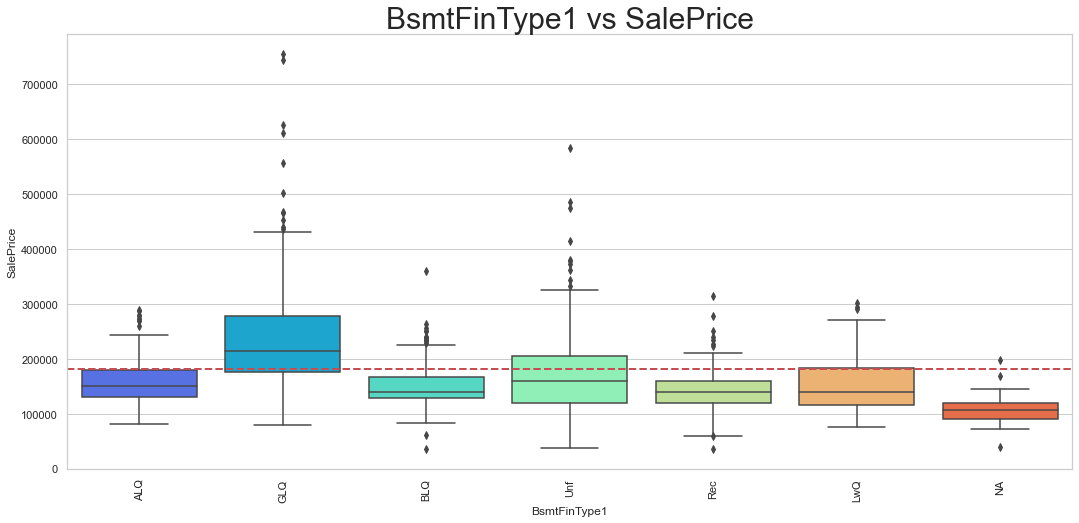

In [54]:
# Let's plot the BsmtFinType1 vs SalePrice plot

plt.figure(figsize=(18,8))
mean_price=np.mean(df['SalePrice'])
sns.boxplot(y='SalePrice',x='BsmtFinType1',data=df,palette="rainbow")
plt.axhline(mean_price,color='r',linestyle='dashed',linewidth=2)
plt.title("BsmtFinType1 vs SalePrice",fontsize=30)
plt.xticks(rotation='vertical')
plt.show()


## Observation:
SalePrice is maximum with GLQ BsmtFinType1.

## Multivariate Analysis:

<Figure size 1008x1008 with 0 Axes>

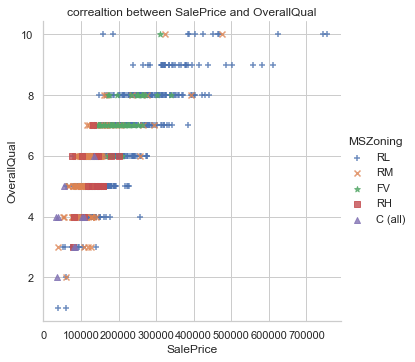

In [55]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='OverallQual',fit_reg=False,data=df,hue='MSZoning',markers=['+','x','*','s','^'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and OverallQual')
plt.ylabel('OverallQual')
plt.show()

## Observation:
With MSZoning RL and increase in OverallQual the SalePrice of a house increases.

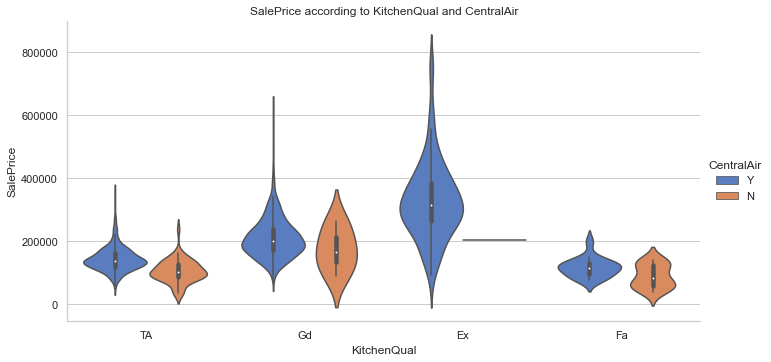

In [56]:
# Let's plot the GarageType and GarageCond with respect to SalePrice plot

sns.factorplot(x='KitchenQual',y='SalePrice',hue='CentralAir',data=df,kind='violin',size=5,palette='muted',aspect=2)
plt.title('SalePrice according to KitchenQual and CentralAir')
plt.xticks()
plt.ylabel('SalePrice')
plt.show()

## Observation:
SalePrice is maximum with Ex kitchenQual and CentralAir.

<Figure size 1008x1008 with 0 Axes>

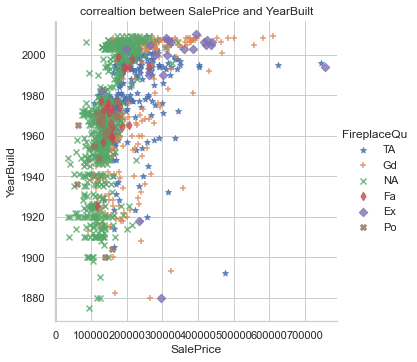

In [57]:
# Let's plot the scatter plot between SalePrice and OverallCond with respect to MSZoning

plt.figure(figsize=(14,14))
sns.lmplot(x='SalePrice',y='YearBuilt',fit_reg=False,data=df,hue='FireplaceQu',markers=['*','+','x','d','D','X'])
plt.xlabel('SalePrice')
plt.title('correaltion between SalePrice and YearBuilt')
plt.ylabel('YearBuild')
plt.show()

## Observation:
As the YearBuilt is increasing SalePrice is also increasing.

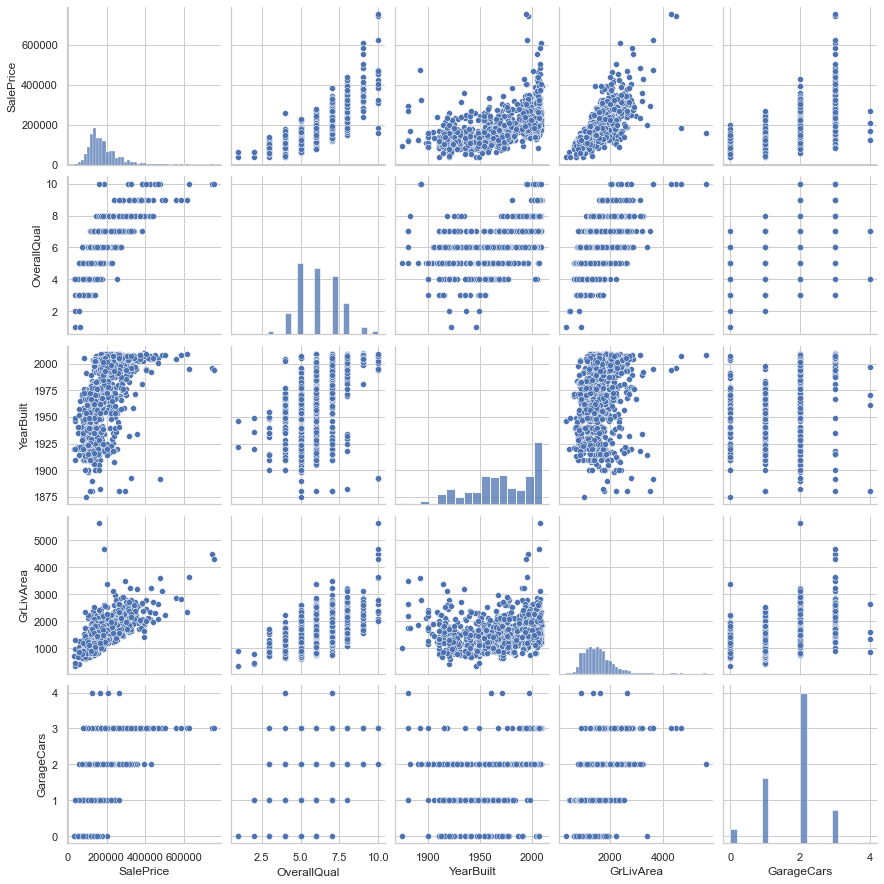

In [58]:
# Let's plot the pairplot

sns.pairplot(df, vars=['SalePrice','OverallQual','YearBuilt','GrLivArea','GarageCars']);

## Observation:
SalePrice is highly positively correlated with GrLivArea and OverallQual.

## PRE-PROCESSING

In [59]:
categorical_cols = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

df = pd.get_dummies(df, columns = categorical_cols, drop_first=True)
df

Id  MSSubClass  LotFrontage  LotArea Alley Utilities  OverallQual  \
0     127         120         70.0     4928   NaN    AllPub            6   
1     889          20         95.0    15865   NaN    AllPub            8   
2     793          60         92.0     9920   NaN    AllPub            7   
3     110          20        105.0    11751   NaN    AllPub            6   
4     422          20         70.0    16635   NaN    AllPub            6   
...   ...         ...          ...      ...   ...       ...          ...   
1163  289          20         70.0     9819   NaN    AllPub            5   
1164  554          20         67.0     8777   NaN    AllPub            4   
1165  196         160         24.0     2280   NaN    AllPub            6   
1166   31          70         50.0     8500  Pave    AllPub            4   
1167  617          60         70.0     7861   NaN    AllPub            6   

      OverallCond  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0               5       1976          1976  ...               0   
1               6       1970          1970  ...               0   
2               5       1996          1997  ...               0   
3               6       1977          1977  ...               0   
4               7       1977          2000  ...               0   
...           ...        ...           ...  ...             ...   
1163            5       1967          1967  ...               0   
1164            5       1949          2003  ...               0   
1165            6       1976          1976  ...               0   
1166            4       1920          1950  ...               0   
1167            5       2002          2003  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            0   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1163               0             0             0            1   
1164               0             0             0            1   
1165               0             0             0            1   
1166               0             0             0            1   
1167               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1163                      0                     0                     0   
1164                      0                     0                     0   
1165                      0                     0                     0   
1166                      0                     0                     0   
1167                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0  
...                    ...                    ...  
1163                     1                      0  
1164                     1                      0  
1165                     1                      0  
1166                     1                      0  
1167                     1         

In [60]:
# Let's drop unnecessary columns

df.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence",],axis=1,inplace=True)
df

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            120         70.0     4928            6            5       1976   
1             20         95.0    15865            8            6       1970   
2             60         92.0     9920            7            5       1996   
3             20        105.0    11751            6            6       1977   
4             20         70.0    16635            6            7       1977   
...          ...          ...      ...          ...          ...        ...   
1163          20         70.0     9819            5            5       1967   
1164          20         67.0     8777            4            5       1949   
1165         160         24.0     2280            6            6       1976   
1166          70         50.0     8500            4            4       1920   
1167          60         70.0     7861            6            5       2002   

      YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  SaleType_ConLI  \
0             1976         0.0         120           0  ...               0   
1             1970         0.0         351         823  ...               0   
2             1997         0.0         862           0  ...               0   
3             1977       480.0         705           0  ...               0   
4             2000       126.0        1246           0  ...               0   
...            ...         ...         ...         ...  ...             ...   
1163          1967        31.0         450           0  ...               0   
1164          2003         0.0           0           0  ...               0   
1165          1976         0.0         566           0  ...               0   
1166          1950         0.0           0           0  ...               0   
1167          2003         0.0         457           0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            0   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1163               0             0             0            1   
1164               0             0             0            1   
1165               0             0             0            1   
1166               0             0             0            1   
1167               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1163                      0                     0                     0   
1164                      0                     0                     0   
1165                      0                     0                     0   
1166                      0                     0                     0   
1167                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        1                      0  
4                        1                      0  
...                    ...                    ...  
1163                     1                      0  
1164      

## Handling outliers and skewness through winsorization technique

In [61]:
# Let's make a copy of our dataset

df_cap = df.copy()

In [62]:
from scipy import stats
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [63]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [64]:
percentile_capping(df, features, 0.01, 0.10)

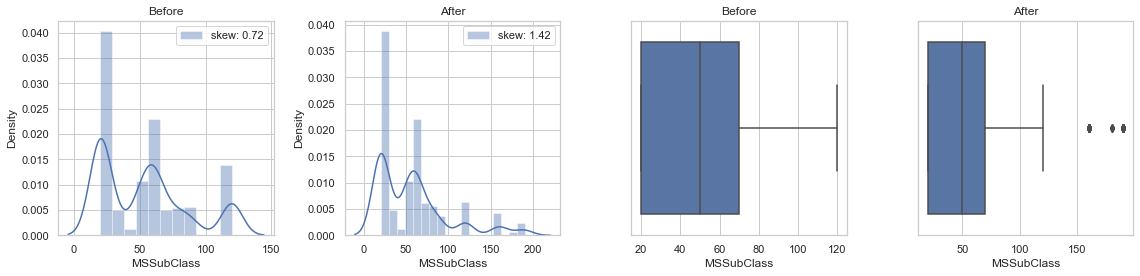

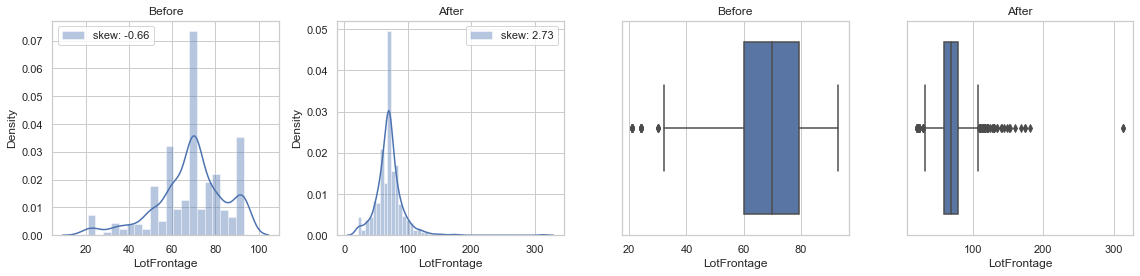

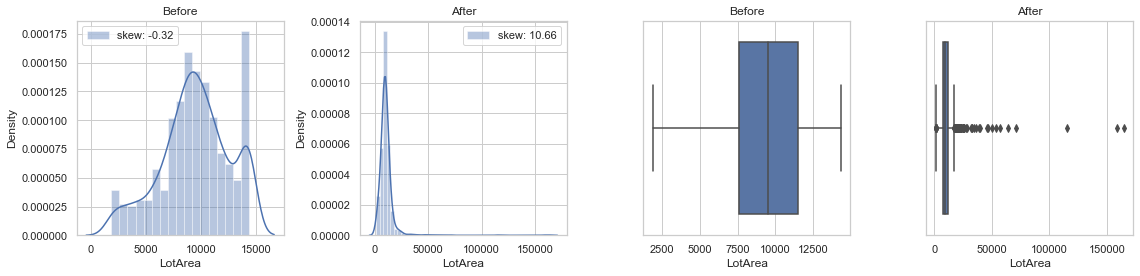

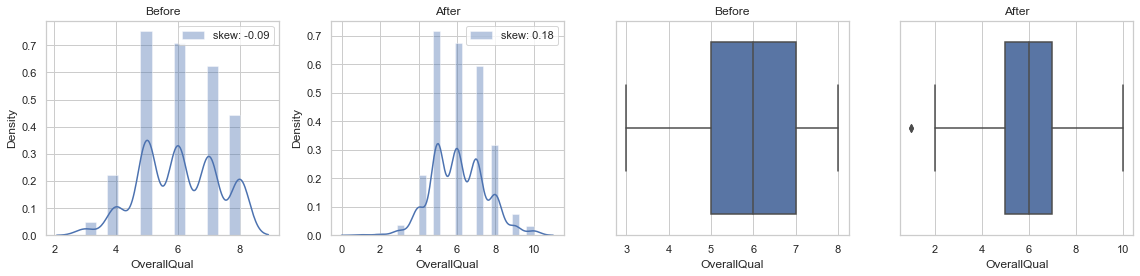

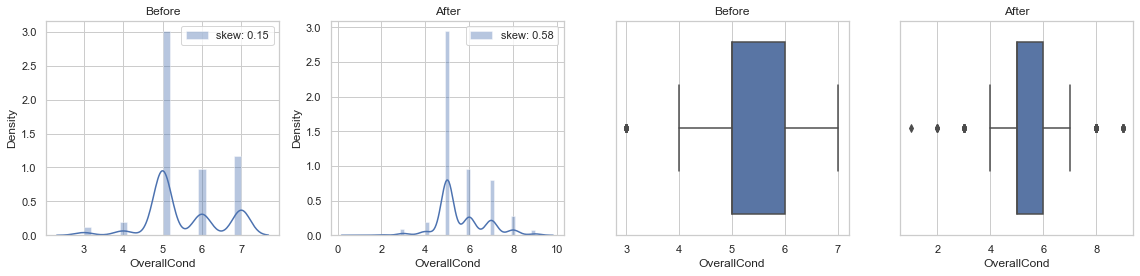

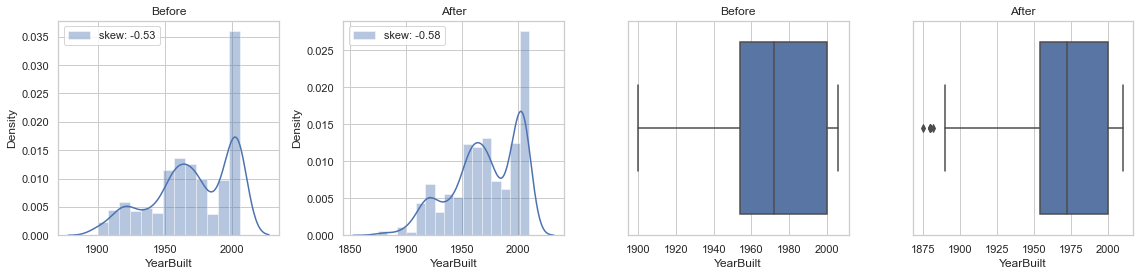

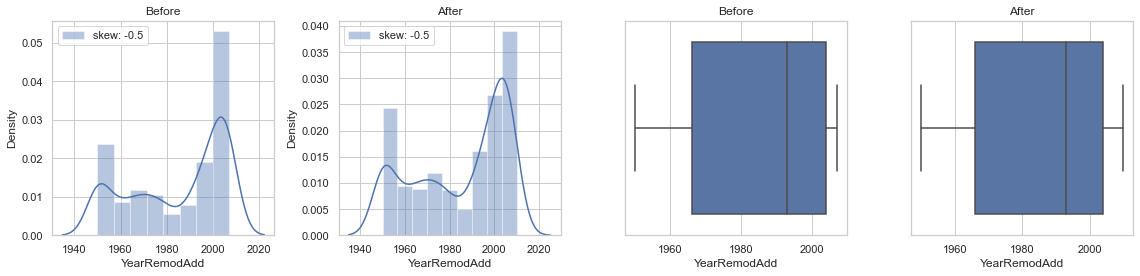

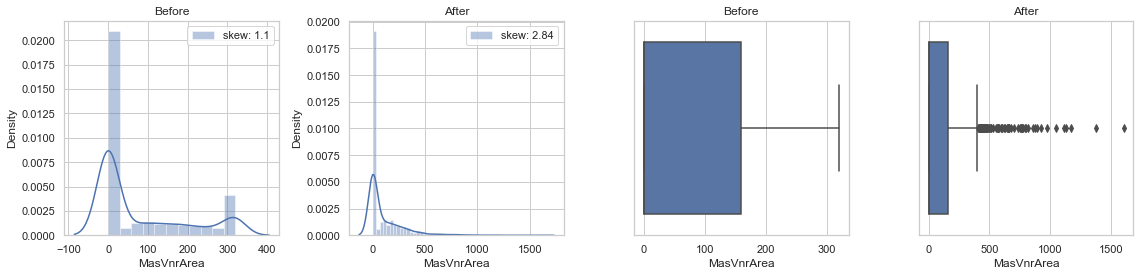

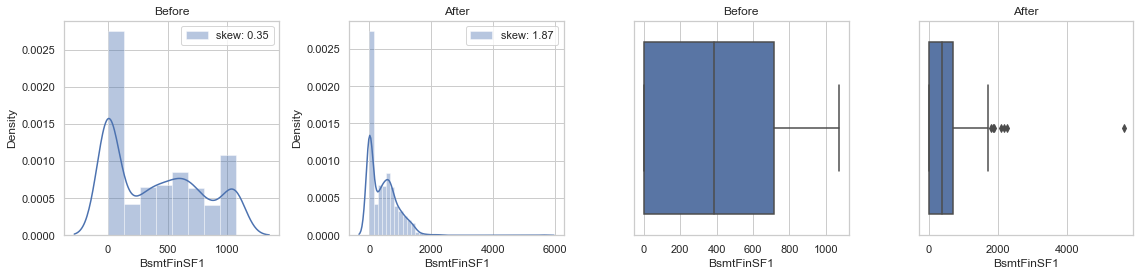

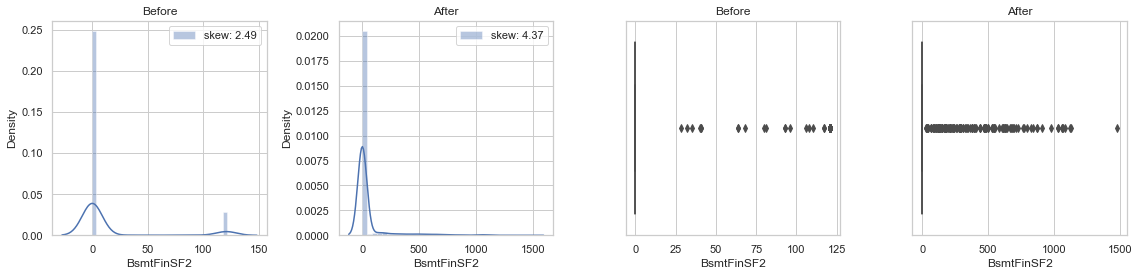

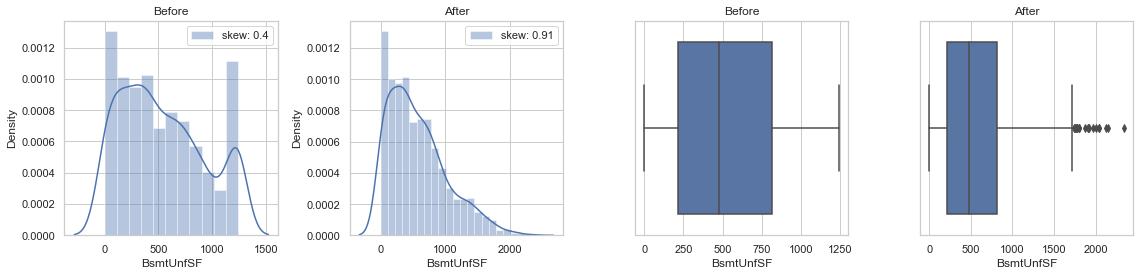

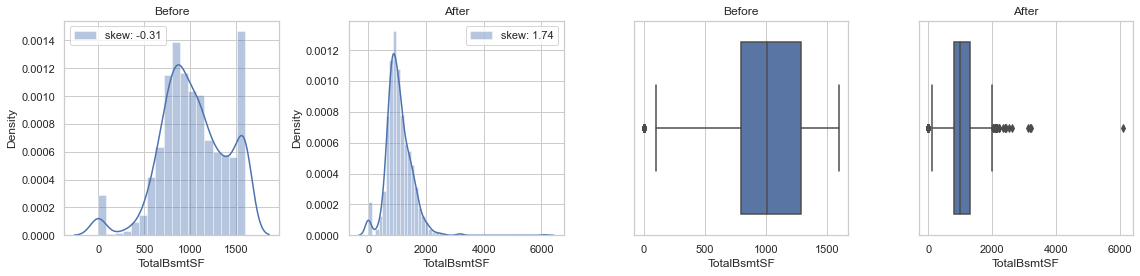

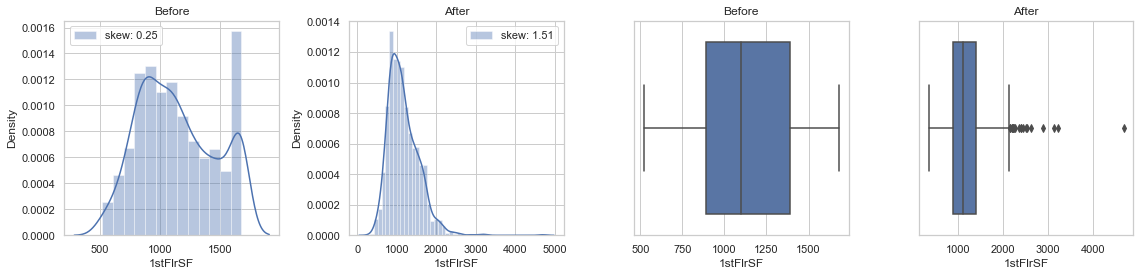

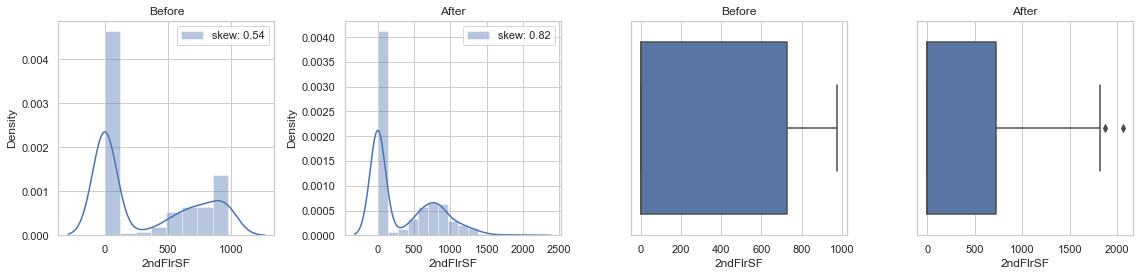

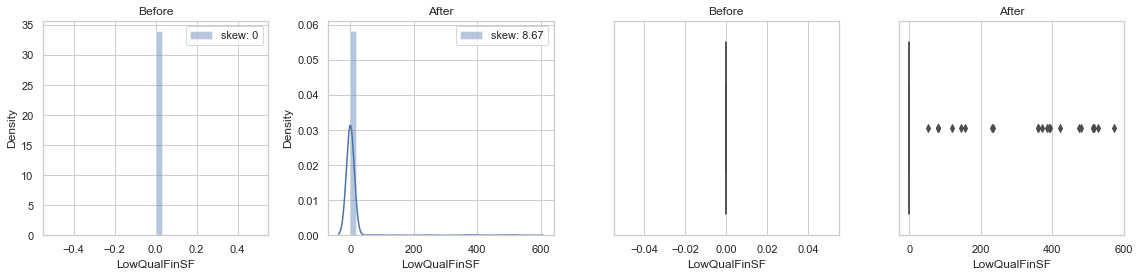

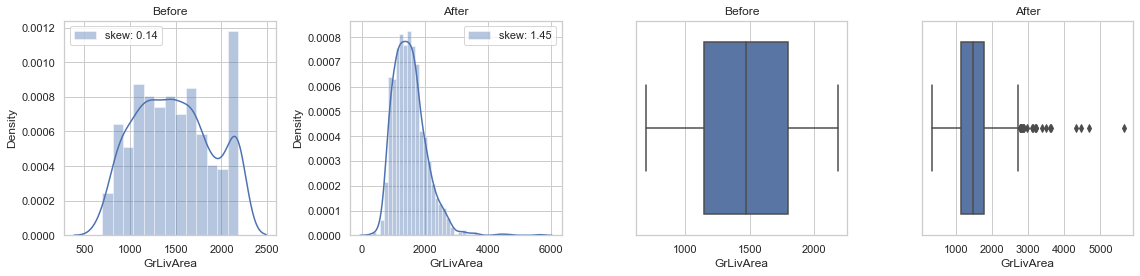

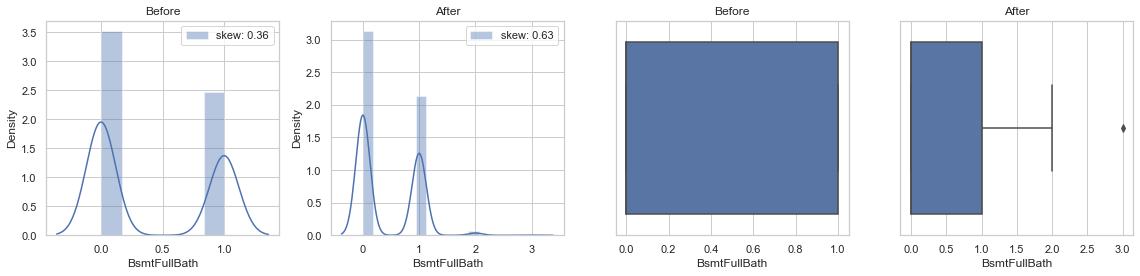

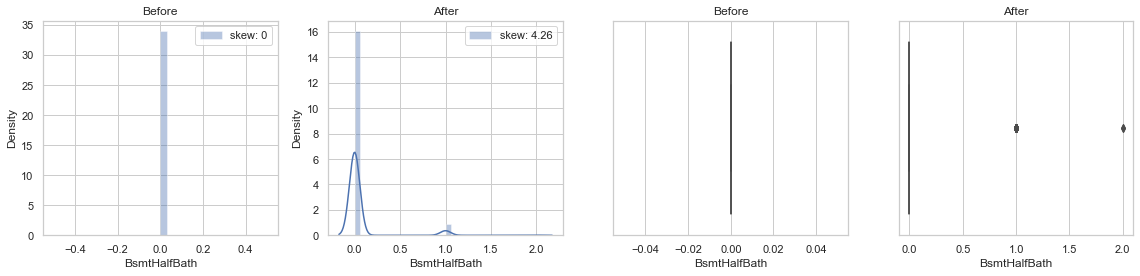

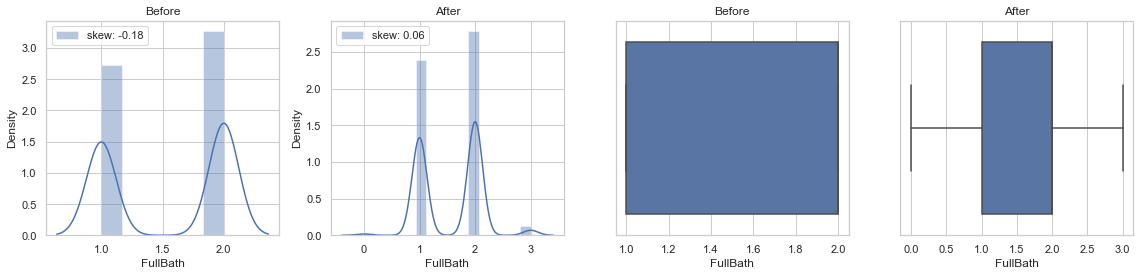

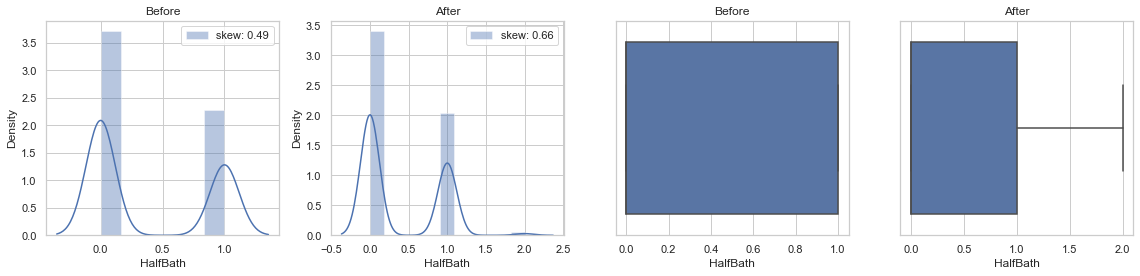

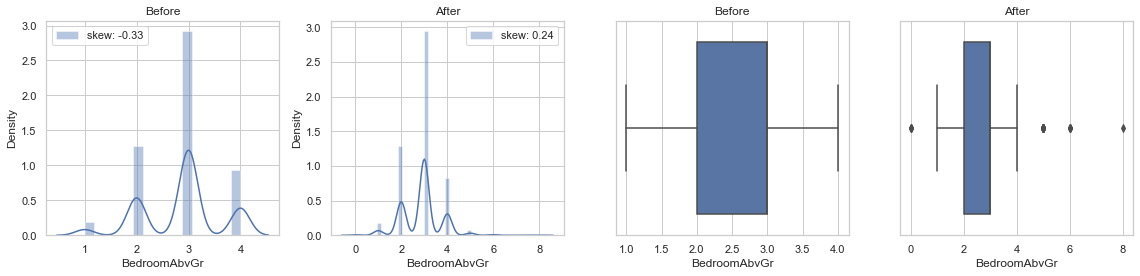

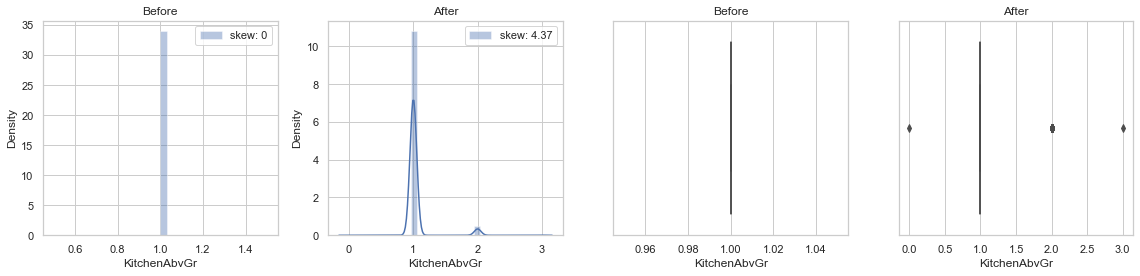

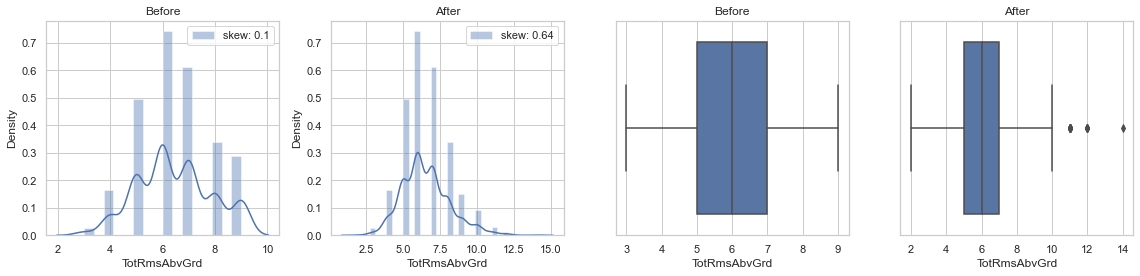

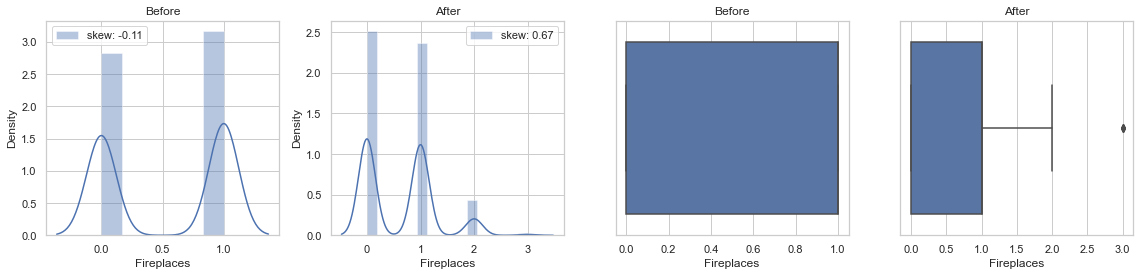

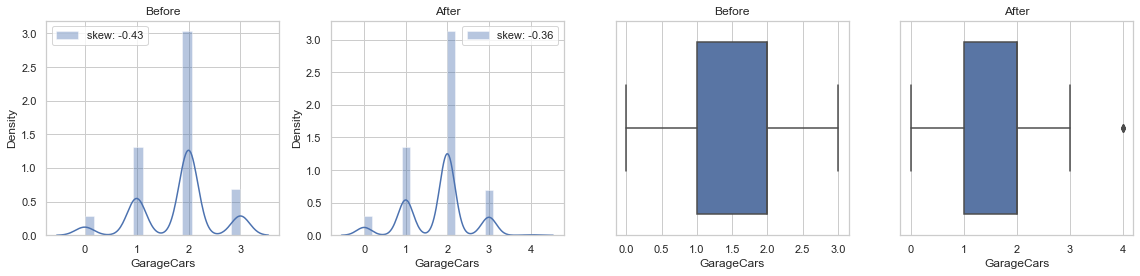

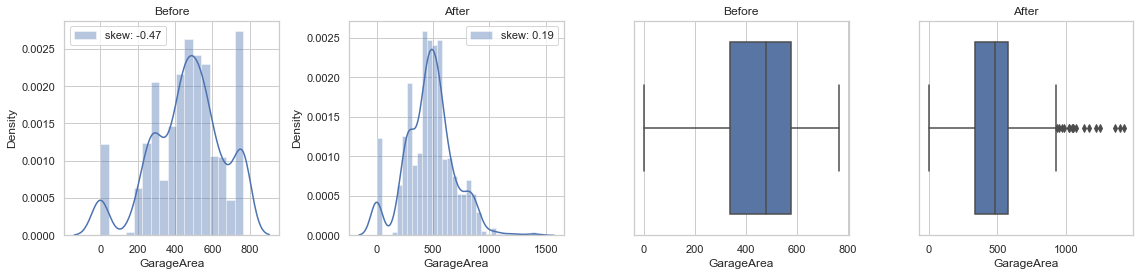

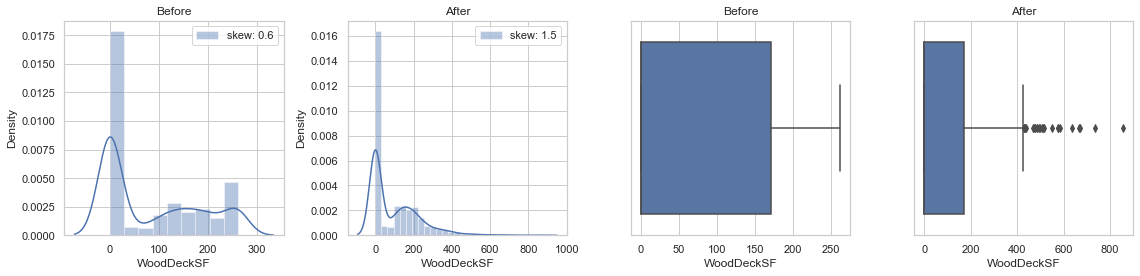

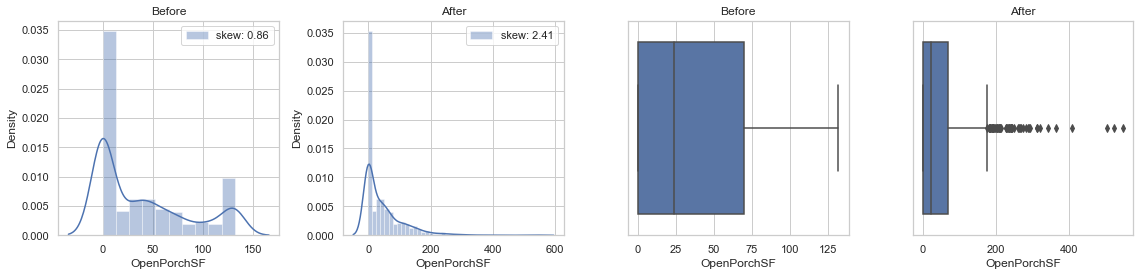

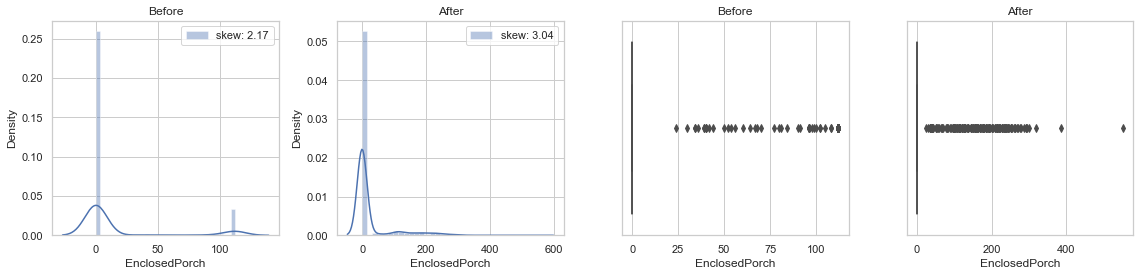

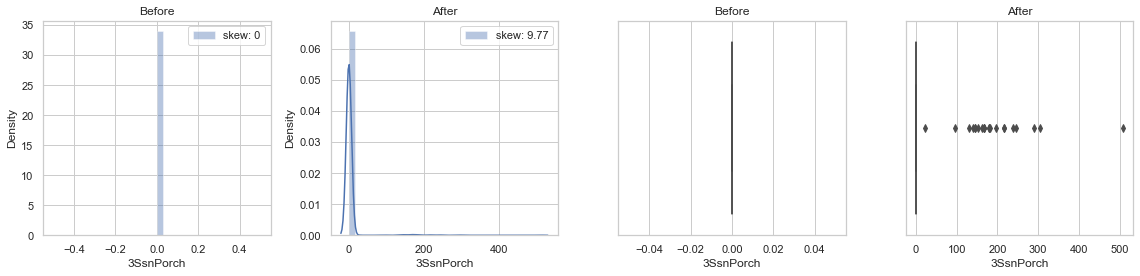

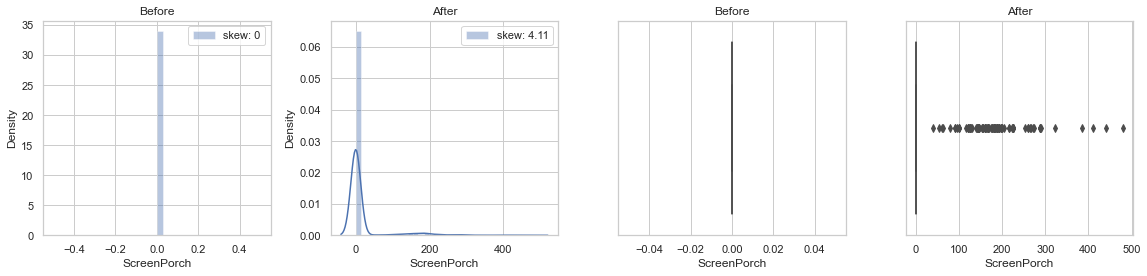

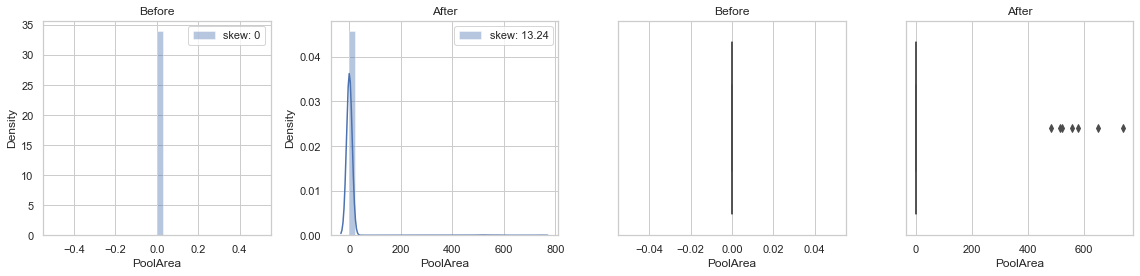

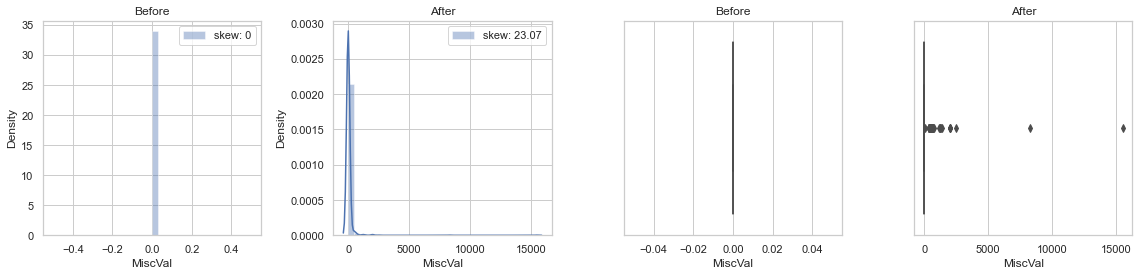

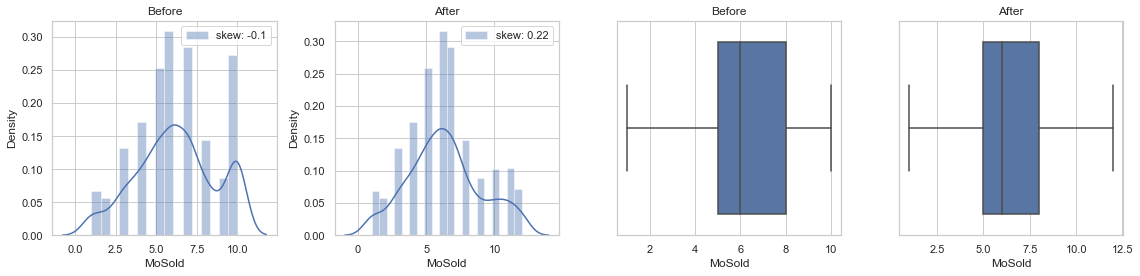

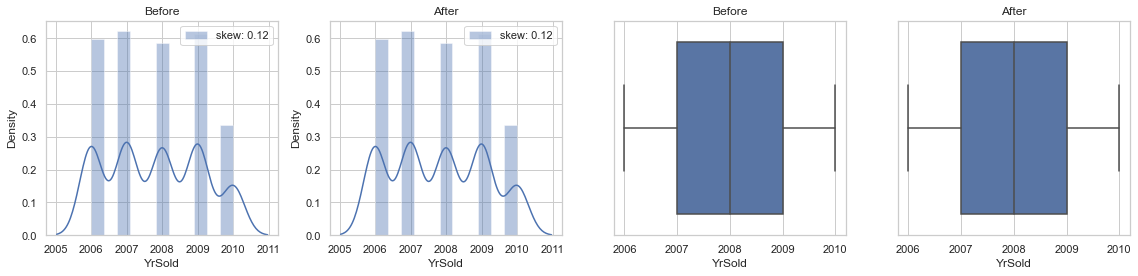

In [65]:
for col in features:
    plt.figure(figsize=(16,4))
    
    plt.subplot(141)
    sns.distplot(df[col], label="skew: " + str(np.round(df[col].skew(),2)))
    plt.title('Before')
    plt.legend()
    
    plt.subplot(142)
    sns.distplot(df_cap[col], label="skew: " + str(np.round(df_cap[col].skew(),2)))
    plt.title('After')
    plt.legend()
    
    plt.subplot(143)
    sns.boxplot(df[col])
    plt.title('Before')
    
    plt.subplot(144)
    sns.boxplot(df_cap[col])
    plt.title('After')
    plt.tight_layout()
    plt.show();

In [66]:
# Let's check the shape

df_cap.shape

(1168, 244)

## MODEL TRAINING

In [67]:
df_x=df_cap.drop(columns=['SalePrice'],axis=1)
y=df_cap['SalePrice']

In [68]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
#Scaling input variables

sc=StandardScaler()
x=sc.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)

## PCA

In [69]:
# Let's explore the PCA

covar_matrix = PCA(n_components = len(x.columns))
covar_matrix.fit(x)

PCA(n_components=243)

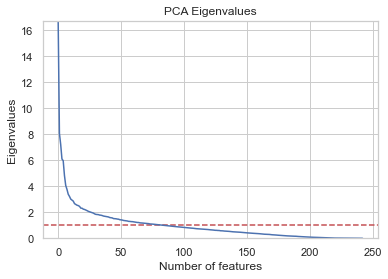

In [70]:
# Let's plot the PCA componenets

plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0,max(covar_matrix.explained_variance_))
plt.style.context('seaborn-whitegrid')
plt.axhline(y=1, color='r', linestyle='--')
plt.plot(covar_matrix.explained_variance_)
plt.show()

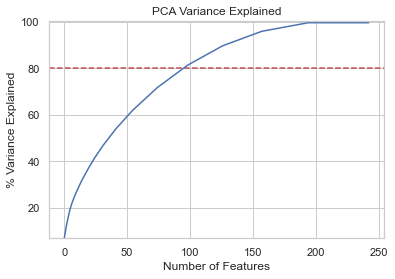

In [71]:
variance = covar_matrix.explained_variance_ratio_
var=np.cumsum(np.round(covar_matrix.explained_variance_ratio_, decimals=3)*100)

plt.ylabel('% Variance Explained')
plt.xlabel('Number of Features')
plt.title('PCA Variance Explained')
plt.ylim(min(var),100.5)
plt.style.context('seaborn-whitegrid')
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()


In [72]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x)
x=xpca

In [73]:
pd.DataFrame(data=x)

0         1          2         3         4         5         6   \
0     0.024203 -1.896909   0.132703  0.813344 -2.206869 -1.805210  1.037211   
1    -2.247515 -4.218680   2.433409  2.469300  5.428115  2.217927  4.352221   
2    -3.177180 -0.067217   0.034236 -0.530071  1.284262 -2.883745  1.488843   
3    -2.108232 -3.530462   1.215773  2.011889  1.144565  0.329636 -3.078372   
4    -3.131143 -1.375870   0.344757  1.784219  0.115037 -0.336015 -0.854639   
...        ...       ...        ...       ...       ...       ...       ...   
1163  3.795602 -2.918548  -1.471870 -0.272931 -2.503198  0.282490 -1.207448   
1164  4.015044  2.373234  10.994049 -4.929940 -3.242785  0.557104  0.477080   
1165  0.639935 -1.219505  -0.937410 -1.445762 -1.286403 -5.677279  0.847801   
1166  6.935117  2.136398  -2.251928 -2.370547  2.506180  1.338263 -0.219645   
1167 -3.748658  1.997127  -0.459556 -0.736366 -0.690369 -2.326092  1.362040   

            7         8         9   ...        80        81        82  \
0     1.146668  0.748400  1.907075  ...  0.458375  1.753429  0.447266   
1    -0.563357 -2.462191  0.707783  ...  0.086039  1.229677 -2.568089   
2     0.123398  0.733656 -1.435224  ...  0.623452  0.273700 -0.508452   
3    -0.169214  1.558108  0.785027  ... -0.888537 -0.105949  0.295003   
4     1.613345 -0.122599 -1.227166  ...  0.418667 -1.146731 -0.069112   
...        ...       ...       ...  ...       ...       ...       ...   
1163 -0.263235  0.681146  0.523922  ... -0.167649 -1.694219  0.226224   
1164 -1.426456 -1.054422 -0.067437  ...  0.525355  2.045286 -0.605127   
1165  3.372890  1.124537  2.770293  ...  1.859458  1.048987  0.063937   
1166 -0.658125  0.997560 -0.601084  ...  1.183505 -0.591909  1.781784   
1167 -1.768487 -0.706845 -0.561849  ...  0.159745 -0.333781 -0.298208   

            83        84        85        86        87        88        89  
0    -1.544199  0.035984 -0.834787  0.321881 -1.533303  0.556748 -0.677373  
1    -1.497247 -0.646376 -0.973429  0.879699 -1.127697  0.416443 -1.907783  
2    -0.461699 -0.639713  0.715938 -1.137361  0.245619  0.207854 -0.508740  
3    -0.005342  0.202631 -0.098561  0.581942 -0.117572 -0.688347  1.086057  
4     0.562493 -0.400742 -0.223857  0.020372  1.545162  0.345303  0.159860  
...        ...       ...       ...       ...       ...       ...       ...  
1163 -1.704429  0.087960  0.191868 -0.599282 -0.527218 -0.435148  0.858450  
1164 -0.110924  1.171279 -0.198852 -0.093629  0.345141 -0.223218  0.787210  
1165 -0.153070 -1.006410  0.573211 -0.401703 -2.551878  1.661477 -1.499428  
1166 -0.542792 -0.010511 -1.686400 -0.034262 -0.594889  0.248783 -0.755586  
1167 -0.255246 -0.646408  0.271674 -0.405465 -0.474932  0.574992 -0.000194  

[1168 rows x 90 columns]

## Finding Best Random State

In [74]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [75]:
# Let's find the best random state

max_r_score=0
for r_state in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("max r2 score corresponding to",final_r_state,"is",max_r_score)

max r2 score corresponding to 17 is 0.8507240329729817


In [76]:
# Let's split the dataset into test and train

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=88)

In [77]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.model_selection import GridSearchCV

In [78]:
model=[LinearRegression(),
       DecisionTreeRegressor(),
       KNeighborsRegressor(),
       SVR(),
       Lasso(),
       Ridge(),
       ElasticNet(),
       RandomForestRegressor(),
       AdaBoostRegressor(),
       GradientBoostingRegressor()
      ]
for m in model:
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('Error:')
    print('Mean absolute error:',mean_absolute_error(y_test,predm))
    print('Mean squared error:',mean_squared_error(y_test,predm))
    print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predm)))
    print("r2_score:",r2_score(y_test,predm))
    print('*************************************************************')
    print('\n')

score of LinearRegression() is: 0.8261885623849852
Error:
Mean absolute error: 20912.728925586456
Mean squared error: 976364504.7347167
Root Mean Squared Error: 31246.831915167284
r2_score: 0.8418204242613713
*************************************************************


score of DecisionTreeRegressor() is: 1.0
Error:
Mean absolute error: 30810.15811965812
Mean squared error: 2155863483.269231
Root Mean Squared Error: 46431.27699373808
r2_score: 0.6507312899227278
*************************************************************


score of KNeighborsRegressor() is: 0.7872613942929165
Error:
Mean absolute error: 25140.612820512823
Mean squared error: 1335919943.1006837
Root Mean Squared Error: 36550.23861892948
r2_score: 0.7835693034766205
*************************************************************


score of SVR() is: -0.04904428034111108
Error:
Mean absolute error: 58204.53456411457
Mean squared error: 6657851394.448467
Root Mean Squared Error: 81595.65793869467
r2_score: -0.0786300646

## Ridge Regressor is giving us minimum Rmse score and it's accuracy is also high so we choose it as our final model.

## Hyperparameter Tuning

In [79]:
# Let's Use the GridSearchCV to find the best paarameters in Ridge Regressor

parameters={'alpha': [25,10,4,2,1.0,0.8,0.5,0.3,0.2,0.1,0.05,0.02,0.01]}
rg=Ridge()

reg=GridSearchCV(rg,parameters,n_jobs=-1)
reg.fit(x,y)
print(reg.best_params_)

{'alpha': 25}


In [80]:
# Let's use the Ridge Regressor with its best parameters

RG=Ridge(alpha=25)
RG.fit(x_train,y_train)
print('Score:',RG.score(x_train,y_train))
y_pred=RG.predict(x_test)
print('\n')
print('Mean absolute error:',mean_absolute_error(y_test,y_pred))
print('Mean squared error:',mean_squared_error(y_test,y_pred))
print('Root Mean Squared error:',np.sqrt(mean_squared_error(y_test,y_pred)))
print('\n')
print("r2_score:",r2_score(y_test,y_pred))
print('\n')

Score: 0.8261453142743175


Mean absolute error: 20755.9300607753
Mean squared error: 962984816.822721
Root Mean Squared error: 31031.99666187661


r2_score: 0.8439880505394382




In [81]:
# Let's Cross validate the Ridge Regressor

score=cross_val_score(RG,x,y,cv=10,scoring='r2')
print("Score:",score)
print('Mean Score:',score.mean())
print("Standard deviation:",score.std())

Score: [0.86132914 0.77281596 0.81960091 0.66658819 0.82178918 0.34883537
 0.83508834 0.68488243 0.55206305 0.84612161]
Mean Score: 0.7209114171531444
Standard deviation: 0.15564079714752715


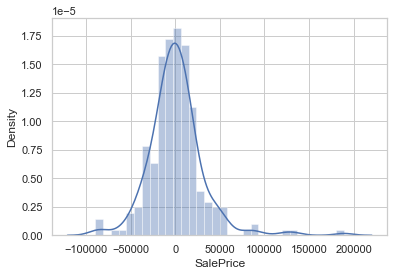

In [82]:
# Let's plot the distribution plot and the Gaussian plot

sns.distplot(y_test-y_pred)
plt.show()

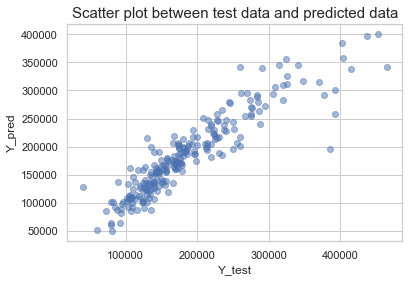

In [83]:
# Let' plot the Scatter plot between test data and predicted data

plt.scatter(y_test,y_pred, alpha=0.5)
plt.xlabel("Y_test")
plt.ylabel("Y_pred")
plt.title("Scatter plot between test data and predicted data",fontsize=15)
plt.show()

## Testing our Dataset

In [84]:
#Let's load the dataset

test=pd.read_csv("test_data.csv")
test

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0           HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3           Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4           Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
..          ...       ...  ...         ...      ...    ...   ...         ...   
287         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
288         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
289         Lvl    AllPub  ...           0        0    NaN   NaN        Shed   
290         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
291         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

    MiscVal MoSold  YrSold  SaleType  SaleCondition  
0         0      7    2007        WD         Normal  
1         0      8    2009       COD        Abnorml  
2         0      6    2009        WD         Normal  
3         0      7    2009        WD         Normal  
4         0      1    2008        WD         Normal  
..      ...    ...     ...       ...            ...  
287       0     10    2008        WD         Normal  
288       0      2    2008        WD         Normal  
289     700      3    2010        WD         Normal  
290       0     10    2006        WD         Normal  
291       0      6    2006        WD         Normal  

[292 rows x 80 columns]

In [85]:
#filling missing values in categorical columns as NA
columns = ["FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "BsmtExposure", "BsmtFinType2", "BsmtCond", "BsmtFinType1", "BsmtQual"]
test[columns] = test[columns].fillna('NA')

#filling missing values in MasVnrType with None
test['MasVnrType'] = test['MasVnrType'].fillna('None')

#filling missing values in GarageYrBlt with 0
test['GarageYrBlt'] = test['GarageYrBlt'].fillna('0')

#Imputing the missing values with their median

test['LotFrontage'].fillna(test['LotFrontage'].median(),inplace=True)
test['MasVnrArea'].fillna(test['MasVnrArea'].median(),inplace=True)

In [86]:
#Encoding categorical columns
categorical_colss = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'] 

test = pd.get_dummies(test, columns = categorical_colss, drop_first=True)

In [87]:
test.drop(['Id','Utilities',"PoolQC", "MiscFeature", "Alley", "Fence"],axis=1,inplace=True)

In [88]:
test

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0            20         86.0    14157            9            5       2005   
1           120         65.0     5814            8            5       1984   
2            20         65.0    11838            8            5       2001   
3            70         75.0    12000            7            7       1941   
4            60         86.0    14598            6            5       2007   
..          ...          ...      ...          ...          ...        ...   
287          20         78.0    10206            8            5       2007   
288          20         57.0     9245            5            5       1994   
289          20         65.0    11241            6            7       1970   
290          50         50.0     5000            6            7       1947   
291         160         21.0     1953            6            5       1973   

     YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  PavedDrive_P  \
0            2006       200.0        1249           0  ...             0   
1            1984         0.0        1036           0  ...             0   
2            2001         0.0           0           0  ...             0   
3            1950         0.0         275           0  ...             0   
4            2007        74.0           0           0  ...             0   
..            ...         ...         ...         ...  ...           ...   
287          2007       468.0          33           0  ...             0   
288          1995         0.0         686           0  ...             0   
289          1970       180.0         578           0  ...             0   
290          1950         0.0         399           0  ...             0   
291          1973       408.0         309           0  ...             0   

     PavedDrive_Y  SaleType_CWD  SaleType_ConLD  SaleType_ConLw  SaleType_New  \
0               1             0               0               0             0   
1               1             0               0               0             0   
2               1             0               0               0             0   
3               1             0               0               0             0   
4               1             0               0               0             0   
..            ...           ...             ...             ...           ...   
287             1             0               0               0             0   
288             1             0               0               0             0   
289             1             0               0               0             0   
290             1             0               0               0             0   
291             1             0               0               0             0   

     SaleType_WD  SaleCondition_Family  SaleCondition_Normal  \
0              1                     0                     1   
1              0                     0                     0   
2              1                     0                     1   
3              1                     0                     1   
4              1                     0                     1   
..           ...                   ...                   ...   
287            1                     0                     1   
288            1                     0                     1   
289            1                     0                     1   
290            1                     0                     1   
291            1                     0                     1   

     SaleCondition_Partial  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  
..                     ...  
287                      0  
288                      0  
289                      0  
290                      0  
291                      0  

[292 rows x 213 columns]

In [89]:
housing_cap=test.copy()

In [90]:
def percentile_capping(test, cols, from_low_end, from_high_end):
    for col in cols:
        stats.mstats.winsorize(a=test[col], limits=(from_low_end, from_high_end), inplace=True)

In [91]:
features=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea','BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']

In [92]:
percentile_capping(housing_cap, features, 0.01, 0.10)
housing_cap.shape

(292, 213)

In [93]:
# Let's Scale the input variables

sc=StandardScaler()
x1=sc.fit_transform(test)
x1=pd.DataFrame(x1,columns=test.columns)

In [94]:
# Let's check the PCA

covar_matrix = PCA(n_components = len(x1.columns))
covar_matrix.fit(x1)

PCA(n_components=213)

In [95]:
pca=PCA(n_components=90)
xpca=pca.fit_transform(x1)
x1=xpca

In [96]:
pd.DataFrame(data=x1)

0         1         2         3         4         5         6   \
0   -7.230157  2.222011  1.496484  4.043805 -1.655639 -0.938563  1.229618   
1   -3.072242 -0.239101  0.445989 -0.207622 -2.681405  2.294892  0.164982   
2   -4.352944  1.294936 -0.698007  0.687803 -1.170315 -1.543662 -1.602387   
3    2.364058 -1.528634  0.738506  0.329316  3.287338 -1.342443  0.537068   
4   -4.680780  2.076735 -1.818632 -0.837280  3.532847 -1.361782  0.684049   
..        ...       ...       ...       ...       ...       ...       ...   
287 -5.088818  1.288022 -0.952124  0.164966 -1.297198 -1.665925 -0.964441   
288 -0.163327 -0.632468 -0.353900 -1.653287 -2.521442 -0.312983  0.007369   
289  0.975206 -2.648628  2.088382  0.749168 -1.112006  0.604258 -0.894954   
290  2.728598 -1.949752 -0.625144 -0.841542  2.141371 -0.728874  2.233374   
291  3.768191 -2.646545 -0.785820 -5.308845  1.306190  3.236218  1.069471   

           7         8         9   ...        80        81        82  \
0   -0.832792 -0.930155  1.453895  ... -0.221739 -0.384322 -0.119743   
1   -1.183889 -0.636800  1.014300  ...  1.303441  1.387335  0.834533   
2    1.987478  0.499538 -0.524646  ... -0.743873  0.475766 -0.307787   
3   -1.117912 -1.383874  1.915644  ...  1.260086  0.489879  0.440977   
4    1.214704  0.471511 -0.417898  ...  1.254937 -0.473327  0.330450   
..        ...       ...       ...  ...       ...       ...       ...   
287  0.188912  0.089998 -0.857465  ...  0.156536  1.040464  0.304121   
288  2.832698 -0.715647 -0.503165  ...  0.020103  0.818470  0.315827   
289  0.607123 -2.172489  0.161085  ...  0.594773 -0.294684  0.339690   
290 -2.913802  1.798795  0.819127  ...  1.282138 -0.643407 -0.243890   
291 -3.256347 -1.592740  0.824843  ...  0.888730  0.112318 -0.769941   

           83        84        85        86        87        88        89  
0    0.065731  0.333320  1.367193  1.021135  0.324552  0.742920 -0.689099  
1   -1.279134  0.657967  3.192575  0.465731  0.816589  0.631655 -0.987268  
2   -0.053860  0.470665 -0.408413 -0.678701  0.292220 -0.459685 -1.135013  
3   -1.126095 -2.048535 -1.410642 -0.410009  0.540840  0.252786 -0.910837  
4   -0.546260 -0.008829 -0.011727  1.058548 -1.106646  0.829515  1.271844  
..        ...       ...       ...       ...       ...       ...       ...  
287 -0.124308  0.233956 -0.357988  0.087849 -0.066396  1.037489  1.241831  
288  0.323232  0.468091 -0.468859 -0.590833 -1.284685  1.123559  0.488292  
289  0.144252  0.325518  1.017870 -0.596642 -1.183449  0.498176 -0.866512  
290 -0.110696 -2.028597  0.934200 -0.178358 -0.659676  0.556940  0.280053  
291 -1.041195 -0.227443  0.411712  0.108631 -0.381900 -0.648069 -0.655092  

[292 rows x 90 columns]

In [97]:
# Let's save our best model

import joblib
joblib.dump(RG,'PFA Housing Project.pkl')

['PFA Housing Project.pkl']

In [98]:
# Let's load our save model

model=joblib.load('PFA Housing Project.pkl')

In [99]:
# Let's Test our save model

import sys
nums= model.predict(x1)
np.set_printoptions(threshold=sys.maxsize)
print(nums)

[262351.40176698 195855.26646921 217212.20561626 149875.99377843
 252440.46253136   2156.63490089 166589.74956103 241984.03598778
 237518.69360899 162551.31069875  17603.32674252 171296.94359568
 119977.74043926 251403.46917375 277790.63512995 145983.76532495
 109045.63123587 138450.36564895 260557.85623621 257744.64546404
 135896.06806472 194372.06775294 174635.79243561  24423.83933443
  55681.45658192 139986.56131234 237147.86911699 182544.14654169
 245410.738563    72542.2172477  148646.55201618 208917.85675756
 222187.48521059 213287.41442485  83147.13077016 221522.58015132
 285954.47883481 125250.06284456 220880.75249378 108875.74800869
  98328.55524747 295126.49756271 219968.71960234 206705.58739697
 160140.00249467 108043.6743951  102244.52938429 -11205.44221521
 213726.44923987 220011.76184268 189520.9911214  164673.11716711
 113227.87815546  13776.59572408 295538.818828   111187.28278105
 144612.15387906 247647.00741576 123991.54615478 248849.26900582
  66455.50045544 258285.8